In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%load_ext line_profiler
import ompy as om
from pathlib import Path
import matplotlib.pyplot as plt

# New Response

In [55]:
rd = om.ResponseData.from_db('Oscar2017').normalize()
rdi = om.ResponseInterpolation.from_data(rd)

In [59]:
e = 900
intp, low, high = om.response.test_compton_lerp(rd, e)
fanned, _, _ = om.response.test_compton_fan(rd, e)
lerped, _ , _ = om.response.test_lerp_end(rd, rdi, e)
whole, _, _ = om.response.test_whole(rd, rdi, e)

<IPython.core.display.Javascript object>


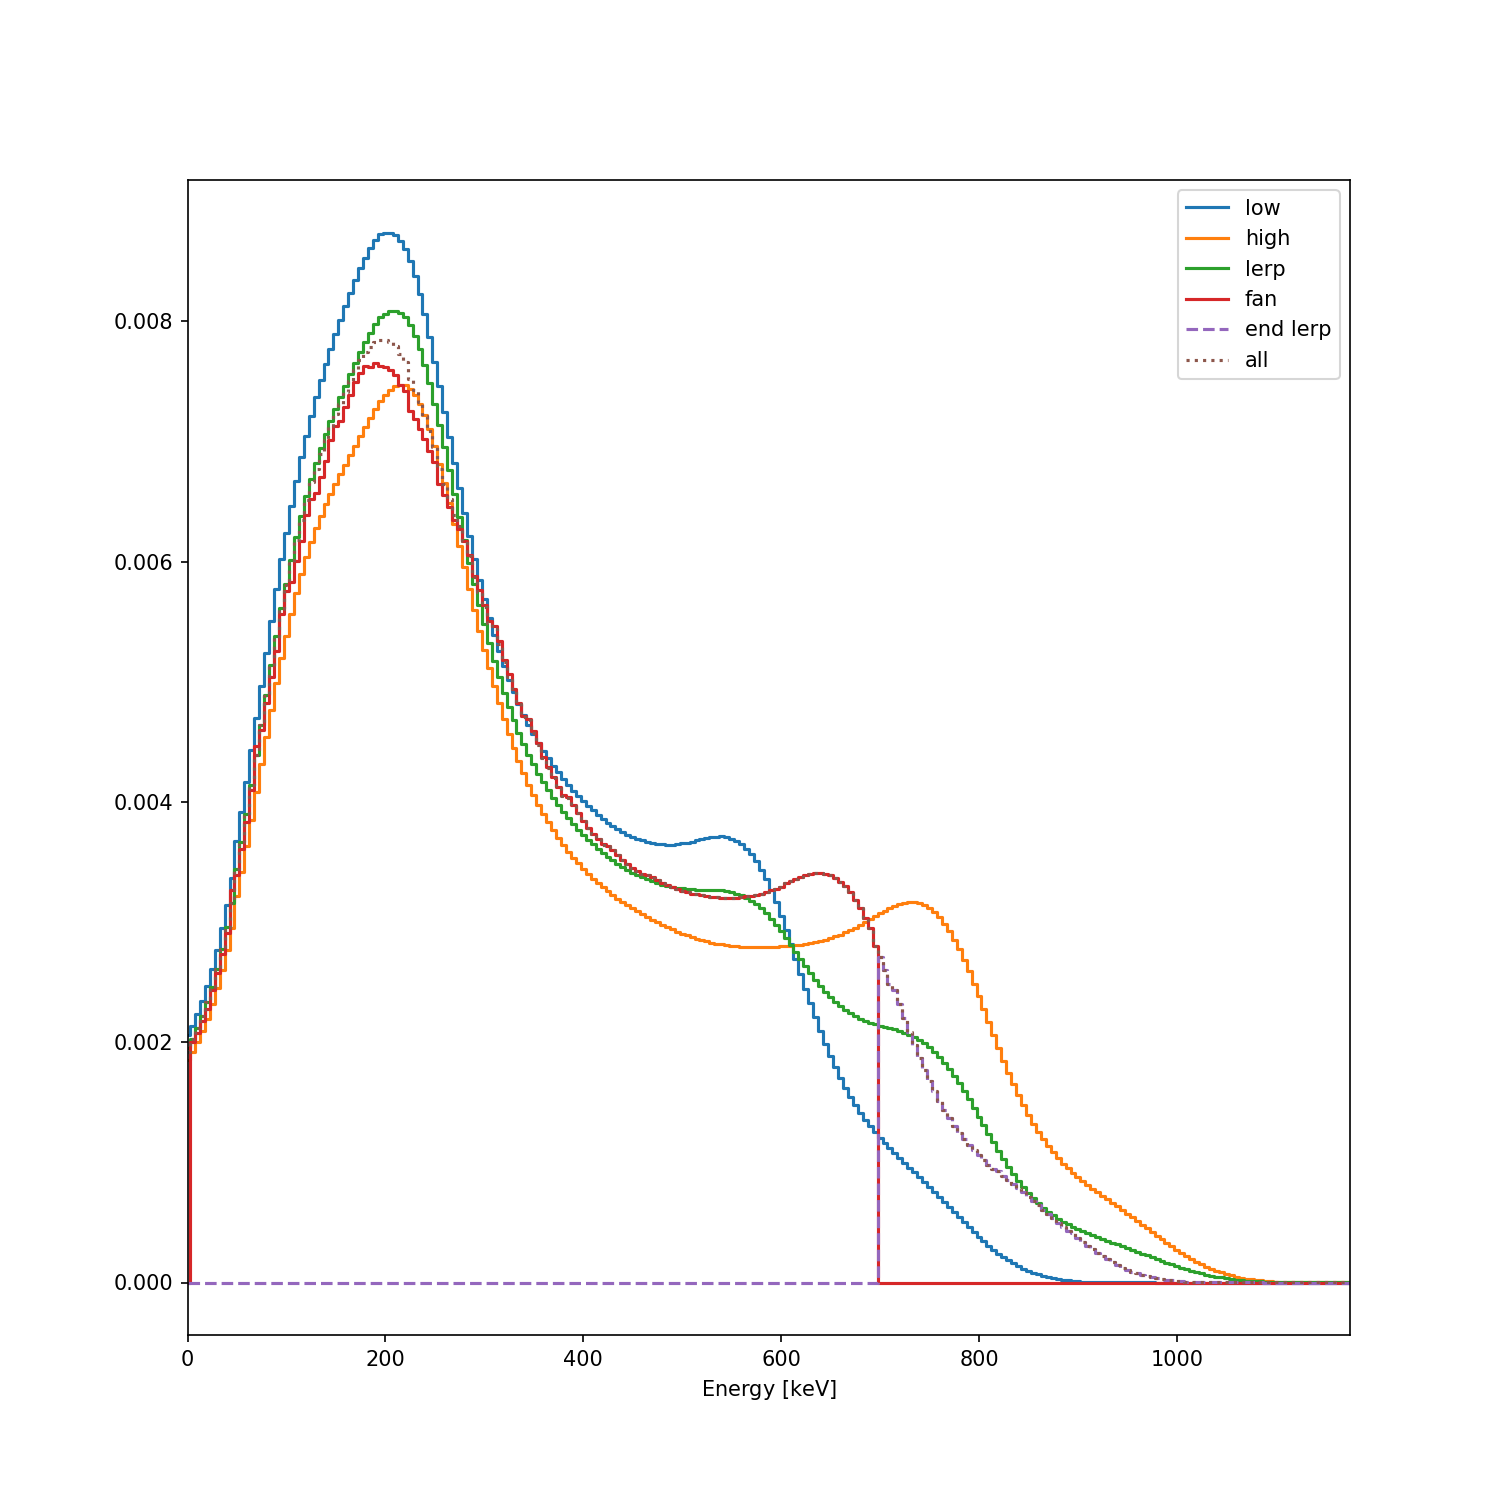

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
low.plot(label='low', ax=ax)
high.plot(ax=ax, label='high')
intp.plot(ax=ax, label='lerp')
fanned.plot(ax=ax, label='fan')
lerped.plot(ax=ax, label='end lerp', linestyle='--')
whole.plot(ax=ax, label='all', linestyle=':')
x = high.last_nonzero()
ax.set_xlim(0, high.E[x])
ax.legend()
fig.savefig('compton.png', dpi=300)

In [2]:
rd = om.ResponseData.from_db('Oscar2017').normalize()
rdi = om.ResponseInterpolation.from_data(rd)

<IPython.core.display.Javascript object>


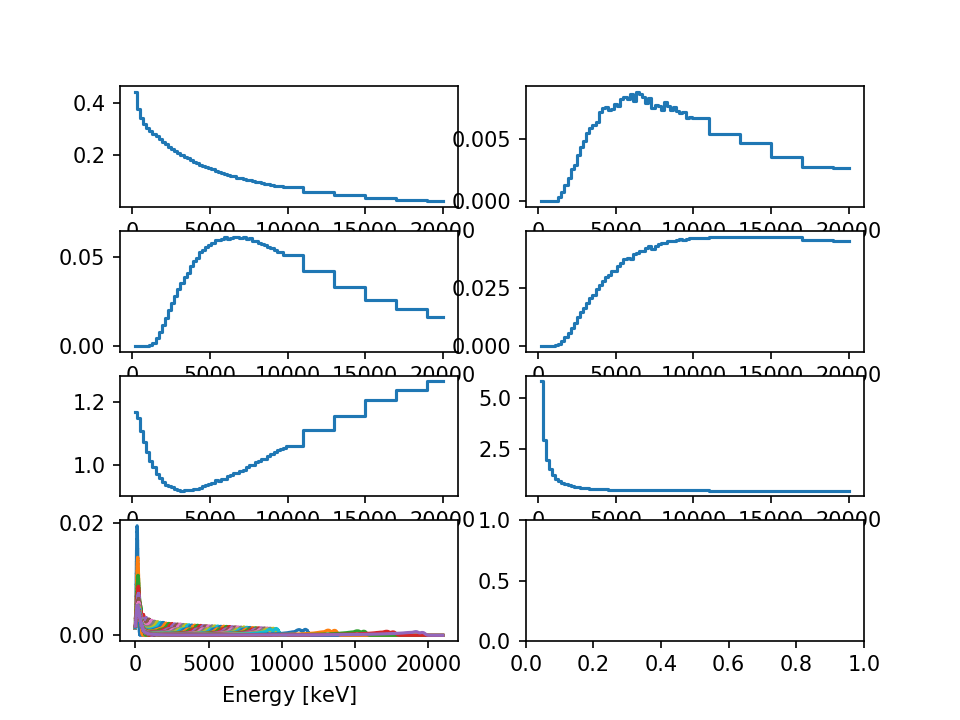

array([<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>, <AxesSubplot: >],
      dtype=object)

In [3]:
#[print(len(c), min(c.E), max(c.E), (c.de), sum(c)) for c in rd.compton]
rd.plot()

In [10]:
E = np.linspace(200, 10000, 1000)
#E = np.linspace(300, 1000, 30)
Ec = rd.E_compton
sigma = om.Vector(E=Ec, values=rdi.sigma(Ec))
M = om.response.interpolate_compton(rd, E, sigma, nsigma=6)

In [23]:
%timeit M = om.response.interpolate_compton(rd, E, sigma, nsigma=6)

482 ms ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%lprun -f om.response.compton._interpolate_compton om.response.interpolate_compton(rd, E, sigma, nsigma=6)

<IPython.core.display.Javascript object>


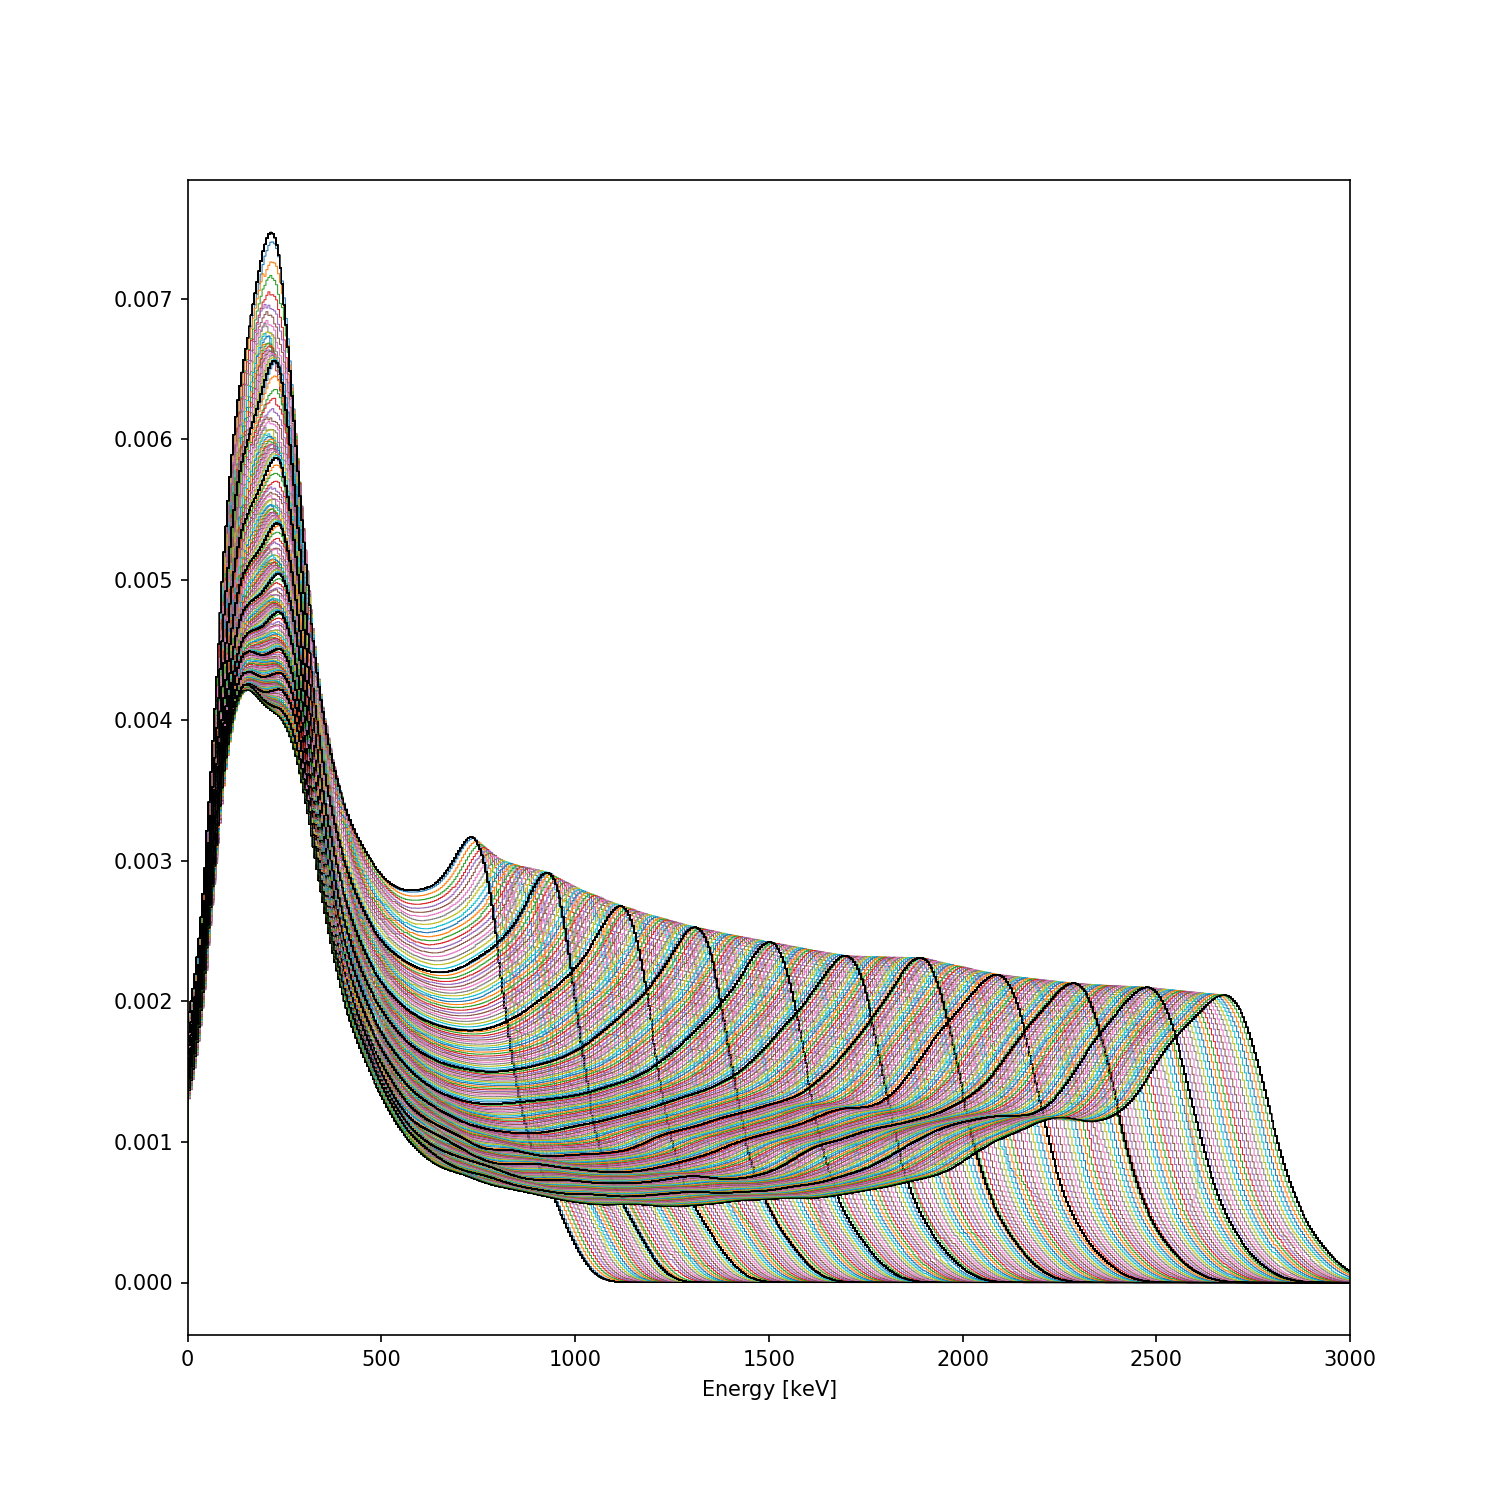

In [12]:
#fig, ax = plt.subplots(figsize=(10, 10))
#M.plot(ax=ax, scale='log', cmap='turbo')
#print(M.projection('Eg').values)
#ax.set_ylim(0, 3000)
#ax.set_xlim(0, 3000)
#M.loc[:6000, :6000].plot(ax=ax)
#M.loc[:1000, :1000].plot(ax=ax)
#M.loc[:1500, :1500].plot(ax=ax, vmin=2e-3, vmax=8e-3, cmap='turbo')
#fig.savefig('compton_matrix.png', dpi=300)
start = M.index_Ex(1000)
stop = M.index_Ex(3000)
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(start, stop):
    s = M.iloc[i, :]
    s.plot(ax=ax, lw=0.5)
    e = M.Ex[i]
    j = rd.FE.index(e)
    rd.compton[j-1].plot(ax=ax, c='k', lw=0.5)
    rd.compton[j].plot(ax=ax, c='k', lw=0.5)
ax.set_xlim(0, 3000)
fig.savefig('test2.png', dpi=400)
#M.rebin('Eg',s.las bins=M.Ex).plot()

In [15]:
thetas = np.linspace(0, np.pi, 20)
lines = []
for theta in thetas:
    line = []
    for e in E:
        eg = om.response.electron_energy(e, theta)
        line.append(eg)
    lines.append(line)

<IPython.core.display.Javascript object>


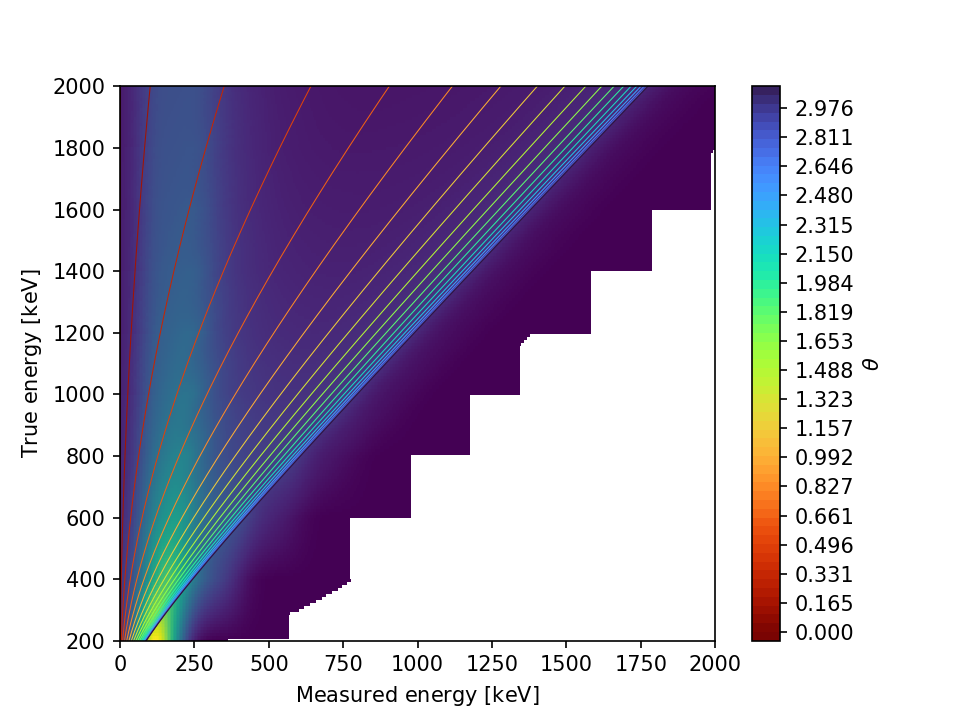

In [16]:
from matplotlib.colors import Normalize
norm = Normalize(vmin=min(thetas), vmax=max(thetas))
fig, ax = plt.subplots()
M.loc[:3000, :3000].plot(ax=ax, add_cbar=False)
for line, theta in zip(lines, thetas):
    ax.plot(line, E, c=plt.cm.turbo_r(theta/max(thetas)), lw=0.5)
sm = plt.cm.ScalarMappable(cmap=plt.cm.turbo_r, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=thetas, 
             boundaries=np.arange(-0.05,np.pi,1/20), label=r'$\theta$')
ax.set_ylim(200, 2000)
ax.set_xlim(0, 2000)
fig.savefig('fan.png', dpi=300)

<IPython.core.display.Javascript object>


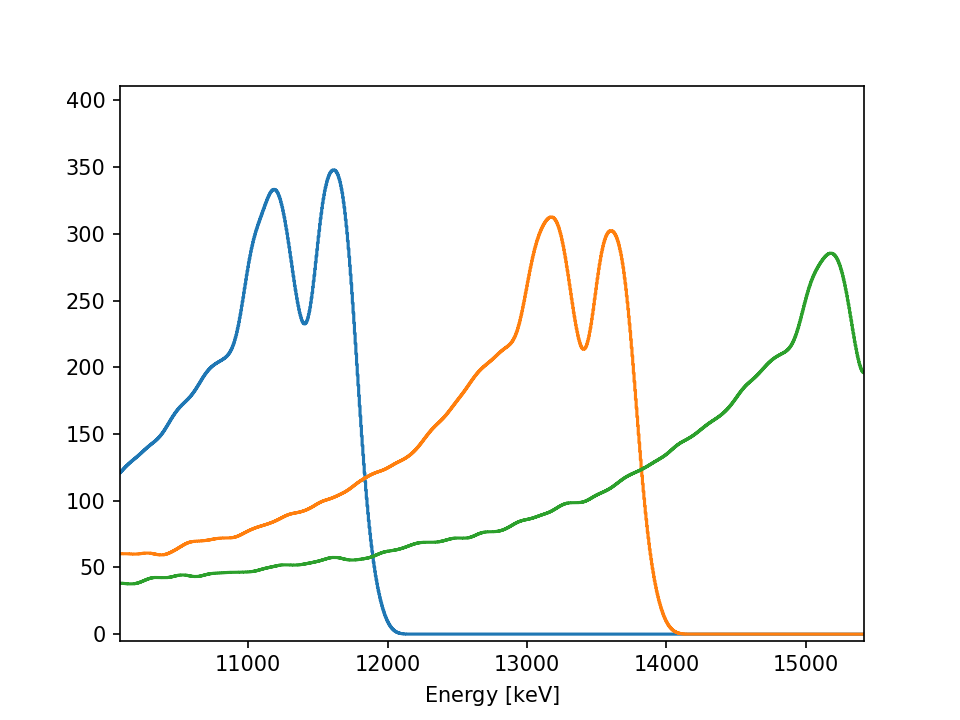

(0.0, 16200.0)

In [72]:
rd = om.ResponseData.from_db('Oscar2017')
x = rd.compton[50]
y = rd.compton[51]
z = rd.compton[52]
ax = x.plot()
y.plot(ax=ax)
z.plot(ax=ax)
i = z.last_nonzero()
ax.set_xlim(0, z.E[i])

In [70]:
for e, z in zip(rd.E, rd.compton):
    print(f"{e}: {len(z)} {z.E[-1]} {sum(z)}")

200.0: 2048 10235.0 181966.0076276672
400.0: 2048 10235.0 201917.34854309217
600.0: 2048 10235.0 204721.98331528268
800.0: 2048 10235.0 204563.03112403332
1000.0: 2048 10235.0 203268.07088531397
1200.0: 4200 20995.0 2008883.6086664174
1400.0: 2048 10235.0 1991654.819941266
1600.0: 2048 10235.0 1971909.3984039014
1800.0: 2048 10235.0 1956939.874683782
2000.0: 2048 10235.0 1949799.9735266927
2200.0: 2048 10235.0 193910.56604677168
2400.0: 2048 10235.0 194050.6032456258
2600.0: 2048 10235.0 193622.79186313026
2800.0: 2048 10235.0 193393.35089599766
3000.0: 2048 10235.0 193922.85522894262
3200.0: 2048 10235.0 194266.45053384104
3400.0: 2048 10235.0 195326.20198203734
3600.0: 2048 10235.0 196580.92861176797
3800.0: 2048 10235.0 196644.69848643313
4000.0: 2048 10235.0 197830.02294107134
4200.0: 2048 10235.0 199413.7995596895
4400.0: 2048 10235.0 200638.34631227626
4600.0: 2048 10235.0 202011.0513703511
4800.0: 2048 10235.0 204026.2298605279
5000.0: 2048 10235.0 205644.31945338417
5200.0: 204

<IPython.core.display.Javascript object>


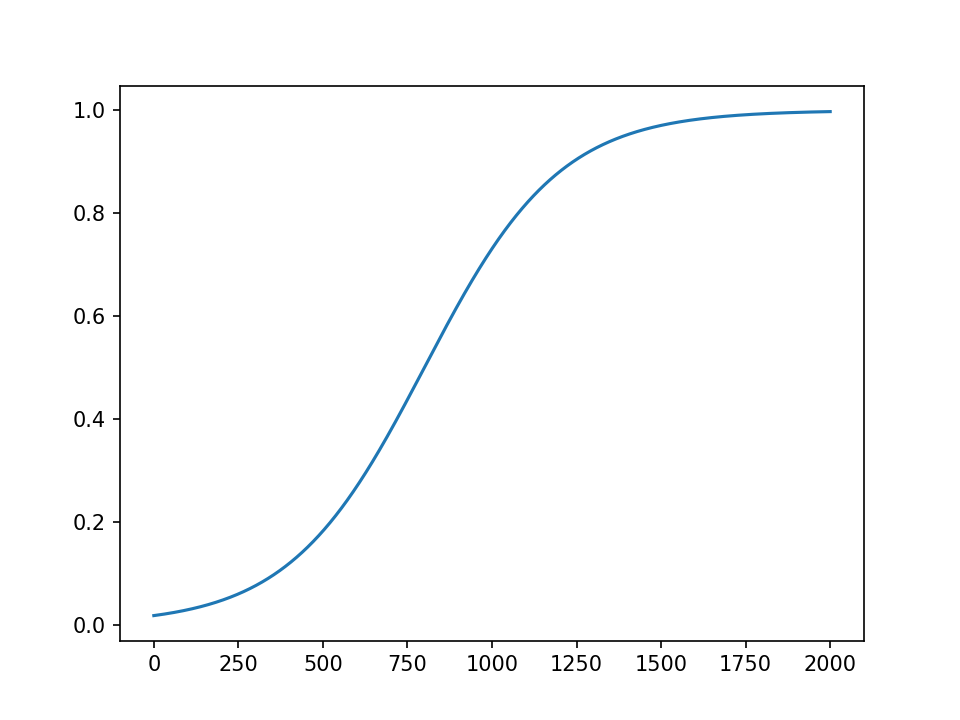

In [18]:
fig, ax = plt.subplots()
E = np.linspace(0, 2000, 5000)
weight = 1 / (1 + np.exp(-1/200 * (E - 800)))
ax.plot(E, weight)

In [19]:
weight

array([0.01798621, 0.01802158, 0.01805701, ..., 0.99751749, 0.99752244,
       0.99752738])

In [17]:
from abc import ABC, abstractmethod

class A:
    def foo(self):
        print("I am A: foo")
    def a(self):
        print('I am A: a', self.x)
    def bar(self):
        print("A bar")
    
class B(ABC):
    def __init__(self, x):
        self.x = x
    def foo(self):
        print("I am B: foo")
    def b(self):
        print('I am B: b', self.x)
    @abstractmethod
    def bar(self):
        pass
    
class C(A, B):
    def __init__(self, x):
        super().__init__(x)
        

c = C('5')
c.a()
c.b()
c.foo()

I am A: a 5
I am B: b 5
I am A: foo


In [18]:
class X(ABC):
    def foo(self):
        print("I am X")
class Y(X):
    pass

Y().foo()
X().foo()

I am X
I am X


# Old Response

In [2]:
p = Path("../OCL_response_functions/oscar2017_scale1.15/")
R = om.Response(p, suffix='.m')

<IPython.core.display.Javascript object>


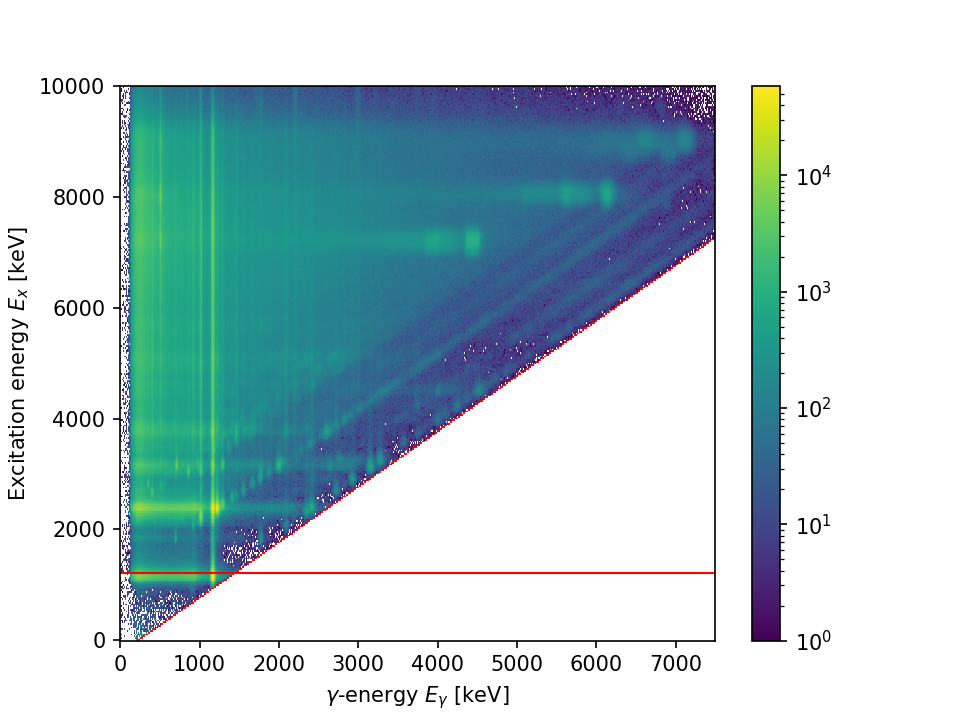

<IPython.core.display.Javascript object>


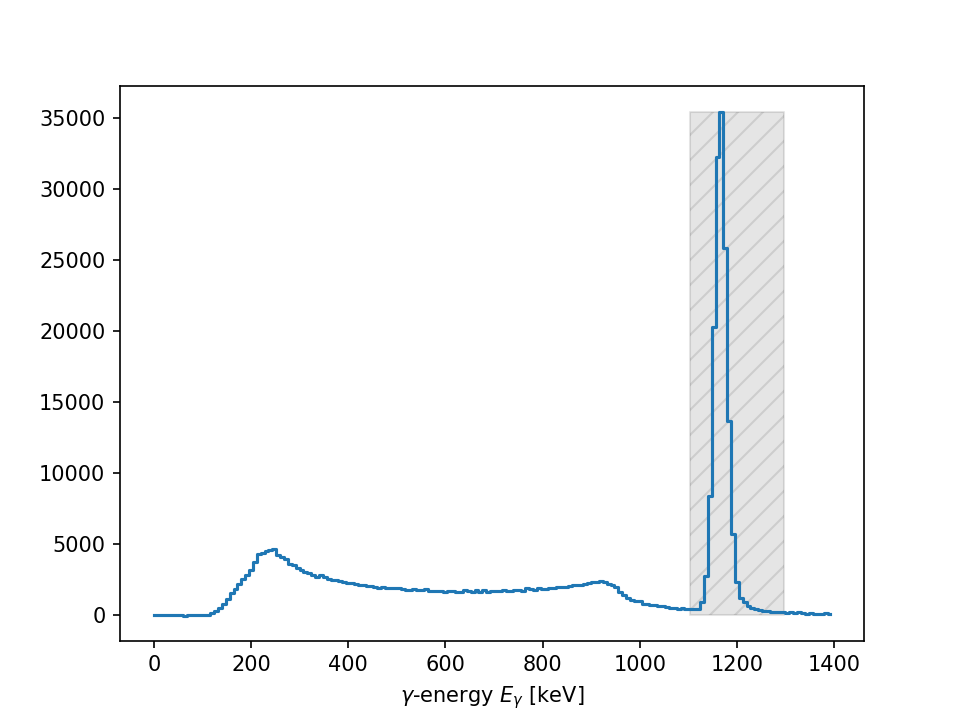

In [3]:
m = om.Matrix(path='120Sn_raw_without_bg.m')
m = m.loc[:'10MeV', :'7.5MeV']
line = om.Line(p1=('1MeV', '0.75MeV'), slope=1)
m[line.above(m)] = 0
ax, _ = m.plot()
ax.axhline(y=1200, lw=1, color='r')
line.plot(m, ax=ax)
spectrum = m.loc['1.2MeV', :'1.4MeV']
ax = spectrum.plot()
region = (1.1e3 < spectrum.E) & (spectrum.E < 1.3e3)
#e = spectrum.E[region]
#ax.fill_betweenx(range(int(max(spectrum))), min(e), max(e), color='k', alpha=0.1, )
ax.fill_between(spectrum.E, max(spectrum.values), where=region, color='k', alpha=0.1, hatch='//')

0.0 0 1
8.0 0 1
16.0 0 2
24.0 0 3
32.0 0 4
40.0 0 5
48.0 0 6
56.0 1 6
64.0 1 7
72.0 1 8
80.0 2 8
88.0 2 9
96.0 3 9
104.0 3 10
112.0 4 10
120.0 4 11
128.0 5 11
136.0 5 12
144.0 6 12
152.0 7 12
160.0 7 13
168.0 8 13
176.0 8 14
184.0 9 14
192.0 10 14
200.0 10 15
208.0 11 15
216.0 12 15
224.0 13 15
232.0 13 16
240.0 14 16
248.0 15 16
256.0 16 16
264.0 16 17
272.0 17 17
280.0 18 17
288.0 19 18
296.0 19 18
304.0 20 19
312.0 21 20
320.0 22 21
328.0 23 22
336.0 23 22
344.0 24 23
352.0 25 24
360.0 26 25
368.0 27 26
376.0 27 26
384.0 28 27
392.0 29 28
400.0 30 29
408.0 31 30
416.0 32 31
424.0 33 32
432.0 33 32
440.0 34 33
448.0 35 34
456.0 36 35
464.0 37 36
472.0 38 37
480.0 39 38
488.0 40 39
496.0 40 39
504.0 41 40
512.0 42 41
520.0 43 42
528.0 44 43
536.0 45 44
544.0 46 45
552.0 47 46
560.0 48 47
568.0 48 47
576.0 49 48
584.0 50 49
592.0 51 50
600.0 52 51
608.0 53 52
616.0 54 53
624.0 55 54
632.0 56 55
640.0 57 56
648.0 58 57
656.0 59 58
664.0 59 58
672.0 60 59
680.0 61 60
688.0 62 61
696.0 63

<IPython.core.display.Javascript object>


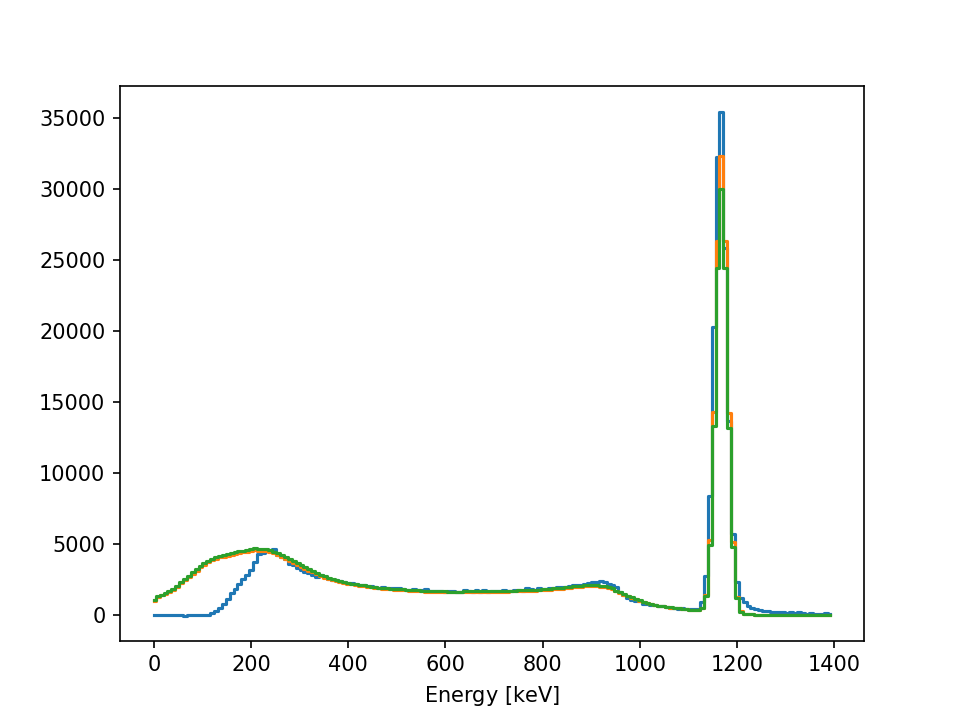

Energy: 0.0 to 1392.0 [keV]
175 bins with dE: 8.0 keV
Total counts: 429377.52000000014



In [13]:
r = R.interpolate(spectrum.E, 30, compton=1)
r2 = R.interpolate(spectrum.E, 30, compton=0.9)

ax=spectrum.plot()
delta = spectrum.clone()
delta[:] = 0
delta.loc[1162] = 487929*0.88
f = r.T@delta
f2 = r2.T@delta
f.plot(ax=ax)
f2.plot(ax=ax)
f.summary()

In [7]:
c = om.Calibrator(R, spectrum)

<IPython.core.display.Javascript object>


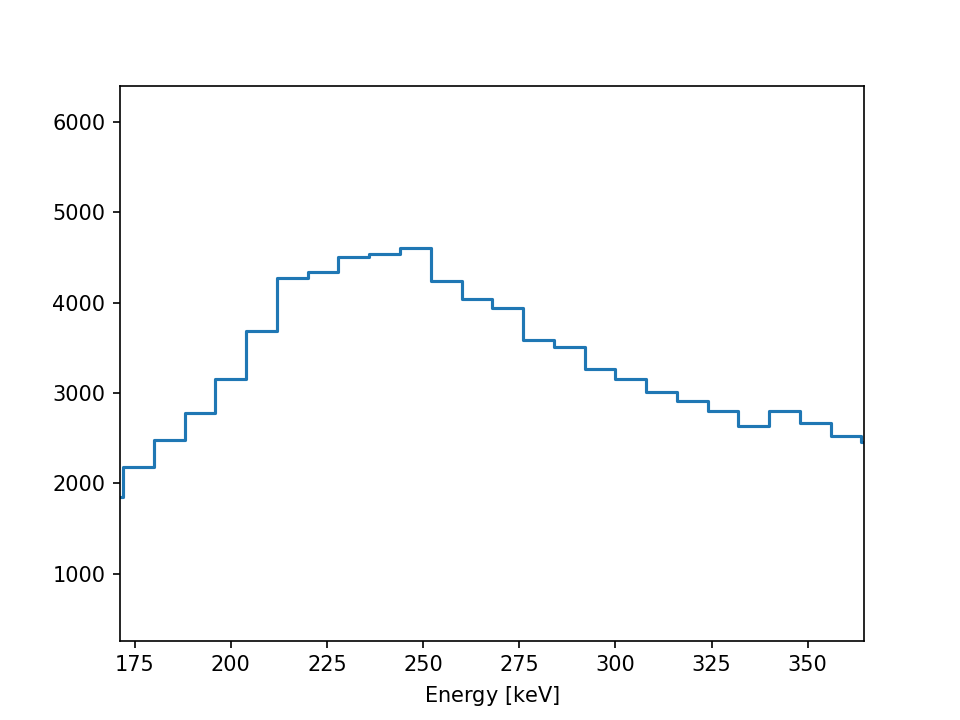

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>

In [8]:
fit = c.fit_FWHM(region)
ax = spectrum.plot()
fit.plot(ax=ax)

In [9]:
c.calibrate_FWHM()

In [16]:
c.fit_FE(region)

p0: [1200.0, 153853.0]


(1162.381544492303,
 487929.1086405382,
  final_simplex: (array([[  1162.38154449, 487929.10864054],
        [  1162.38146148, 487929.10862023],
        [  1162.38157875, 487929.10860941]]), array([1989354.7448458, 1989354.7448458, 1989354.7448458]))
            fun: 1989354.7448457961
        message: 'Optimization terminated successfully.'
           nfev: 150
            nit: 76
         status: 0
        success: True
              x: array([  1162.38154449, 487929.10864054]))

 final_simplex: (array([[0.89797363],
       [0.89798584]]), array([18395.58335358, 18395.58344839]))
           fun: 18395.58335357638
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([0.89797363])
453019.6979122358


<IPython.core.display.Javascript object>


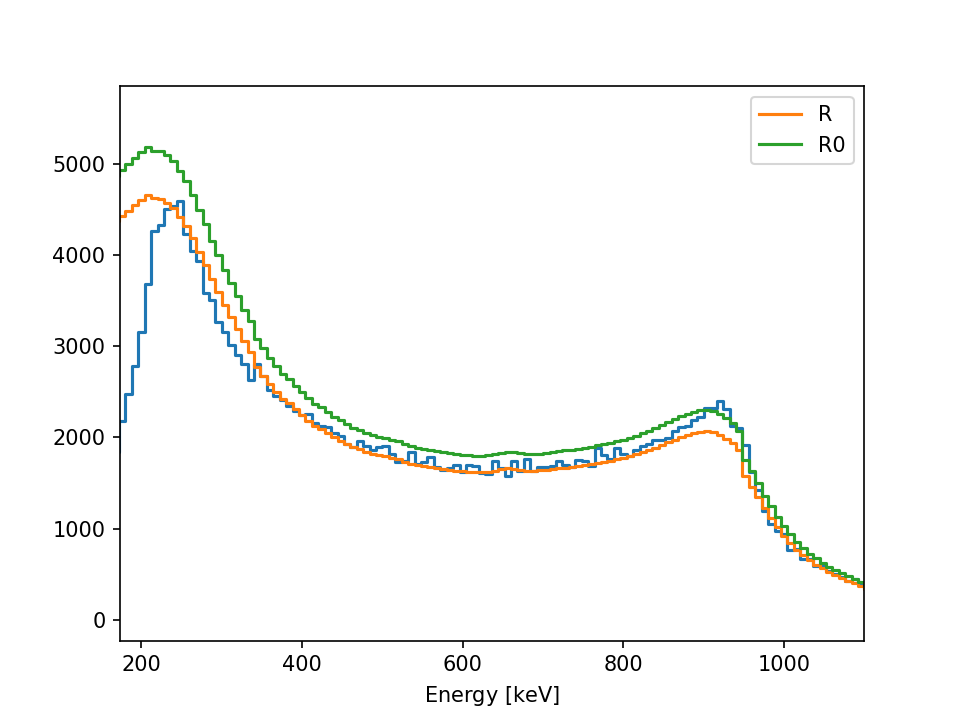

487929.1086405382


In [28]:
bad = spectrum.E < 250
c1, c0, C = c.calibrate_compton(region, ignore=bad)

In [26]:
c1.inverse_ratio('FE', c0)

1.0208303218506538

In [30]:
C/1.0208

477986.9794676119

In [31]:
sum(c1) / sum(c0)

0.9795947265624999

In [32]:
487929 * 0.97959

477970.36910999997

In [33]:
453019/0.97959

462457.7629416389

In [183]:
r = R.interpolate(spectrum.E, 30, compton=1)

[ 325626.00762767  323327.34854309  309991.98331528  300296.03112403
  291795.07088531 2838869.60866642 2782246.81994127 2729312.3984039
 2693593.87468378 2668643.97352669  264497.56604677  263490.60324563
  262946.79186313  261886.350896    261842.85522894  262170.45053384
  262988.20198204  264118.92861177  264008.69848643  265606.02294107
  266573.79955969  268306.34631228  269108.05137035  271097.22986053
  272140.31945338  274294.59392017  276448.22465877  276613.13606758
  277688.40363874  278376.59474285  281257.92011885  282020.25999182
  283809.22440984  284705.65472553  286339.43364633  287812.5594031
  290280.03140611  292029.07240011  292665.99252842  295281.05299692
  297135.27050362  299004.84293345  299394.90400941  302087.9477315
  303040.20914184  305640.23649661  306751.89390589  307599.08344139
  309268.88007661  311167.09633508  326493.87920972  339545.4928166
  353984.64122934  362698.3702232   371095.25724735]


In [77]:
r2 = R.interpolate(spectrum.E, 30, compton=0.89)

<IPython.core.display.Javascript object>


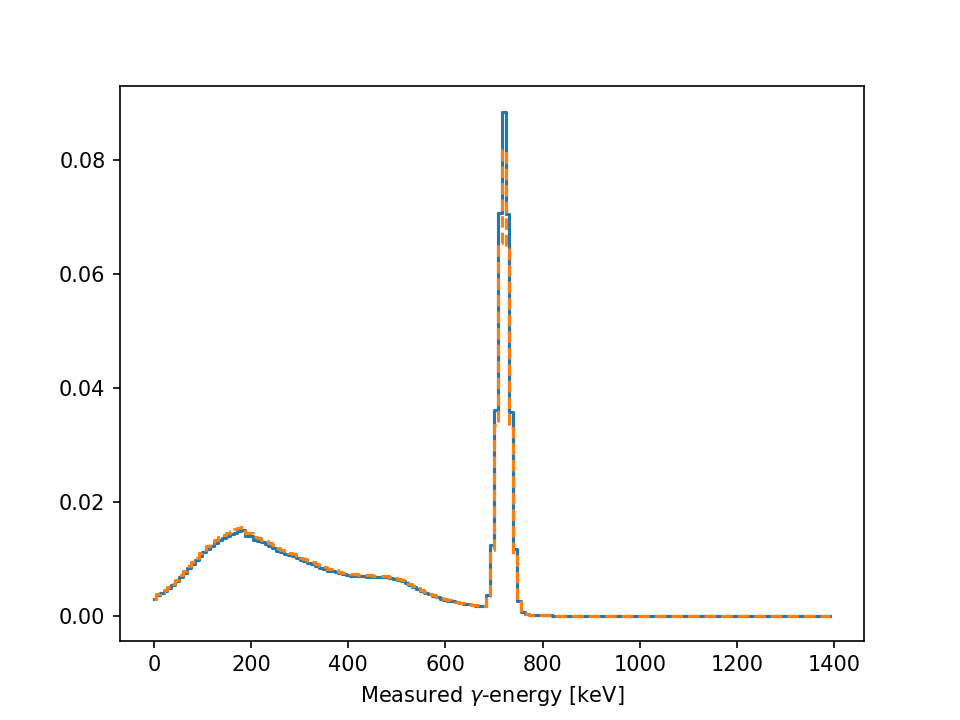

<AxesSubplot: xlabel='Measured $\\gamma$-energy [$\\mathrm{keV}$]'>

In [79]:
N = 90
ax = r.iloc[N,:].plot()
r2.iloc[N,:].plot(ax=ax, linestyle='--')

In [88]:
def foo(C1, C0):
    def weight(C):
        pcmp = R.compton_matrix.sum(axis=1)
        N = C.FE*R.resp['FE'] + C.SE*R.resp['SE'] + C.DE*R.resp['DE'] + C.c511*R.resp['c511'] + C.compton*pcmp
        return N.to_numpy()
    return C0.FE / C1.FE * weight(C1)/weight(C0)
foo(c0, c1)

array([1.06046144, 1.06805118, 1.07224726, 1.07469198, 1.07651066,
       1.07781551, 1.07878934, 1.07957941, 1.08005803, 1.08054823,
       1.0808455 , 1.08124293, 1.08123054, 1.08148174, 1.08173775,
       1.08178373, 1.0819898 , 1.08217747, 1.08224347, 1.08224147,
       1.08262845, 1.08259658, 1.08294025, 1.08317068, 1.08353723,
       1.08361558, 1.08403602, 1.08404972, 1.08460619, 1.08471615,
       1.08512763, 1.08530835, 1.08557803, 1.08611962, 1.08628654,
       1.08642386, 1.08717344, 1.08729587, 1.0876771 , 1.08801483,
       1.08824333, 1.08871822, 1.08906349, 1.08957263, 1.0897701 ,
       1.09024316, 1.09060968, 1.09077552, 1.09123133, 1.09142648,
       1.09475472, 1.09748705, 1.09976912, 1.10156839, 1.10296282])

In [91]:
453019*1.077

487901.463

# 12C Testing

<IPython.core.display.Javascript object>


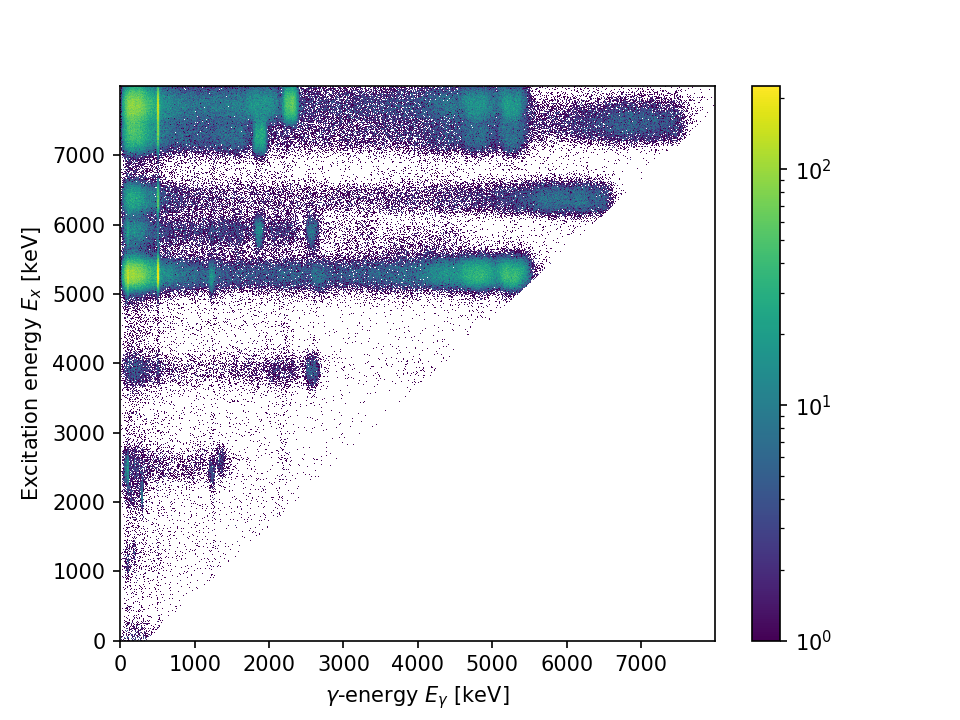

(<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f0590415270>,
  <matplotlib.colorbar.Colorbar at 0x7f0589977040>))

In [121]:
m = om.Matrix(path="./12C_raw.m")
m = m.loc[:'8MeV', :'8MeV']
line = om.Line(p1=('1MeV', '0.65MeV'), slope=1)
m[line.above(m)] = 0
m.plot()

In [122]:
#data = om.get_nucleus('11C')
data = om.get_nucleus('15N')

<IPython.core.display.Javascript object>


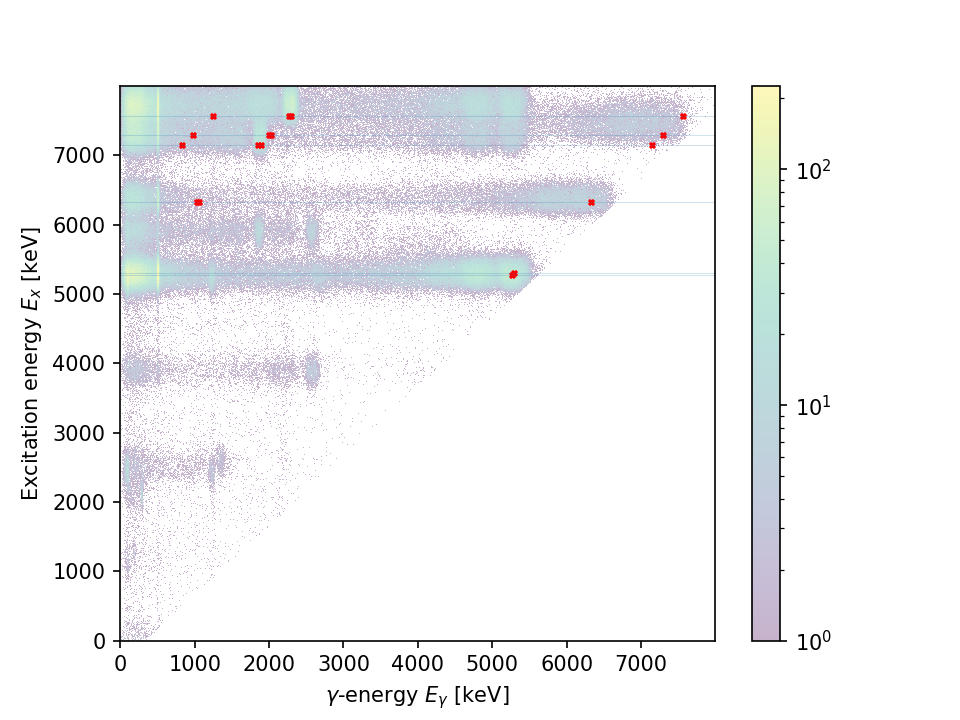

<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>

In [123]:
ax, _ = m.plot(alpha=0.3)
data.levels.query('E < 8000').plot(ax=ax, lw=0.5, alpha=0.2)
data.gammas.query('Ei < 8000').scatter(ax=ax, marker='x', s=6, color='r')
data.gammas.query('Ei < 8000').scatter_cascades(generation=2, ax=ax, marker='x', s=6, color='blue')
data.gammas.query('Ei < 8000').scatter_cascades(generation=3, ax=ax, marker='x', s=6, color='green')

In [125]:
data.gammas.query('Ei < 8000').transitions()

(array([5270.155, 5298.822, 6323.78 , 6323.78 , 6323.78 , 7155.05 ,
        7155.05 , 7155.05 , 7155.05 , 7300.83 , 7300.83 , 7300.83 ,
        7300.83 , 7567.1  , 7567.1  , 7567.1  , 7567.1  ]),
 [[Gamma(Ei=5270.155, E=5269.161, jpi=[Spin(spin=2, parity=True)], T='1.79 PS 10')],
  [Gamma(Ei=5298.822, E=5297.817, jpi=[Spin(spin=2, parity=True)], T='17 FS 5')],
  [Gamma(Ei=5270.155, E=5269.161, jpi=[Spin(spin=2, parity=True)], T='1.79 PS 10')],
  [Gamma(Ei=5298.822, E=5297.817, jpi=[Spin(spin=2, parity=True)], T='17 FS 5')],
  [Gamma(Ei=6323.78, E=6322.35, jpi=[Spin(spin=2, parity=False)], T='0.146 FS 8')],
  [Gamma(Ei=5298.822, E=5297.817, jpi=[Spin(spin=2, parity=True)], T='17 FS 5')],
  [Gamma(Ei=7155.05, E=7153.22, jpi=[Spin(spin=2, parity=True)], T='12 FS 6')],
  [Gamma(Ei=6323.78, E=6322.35, jpi=[Spin(spin=2, parity=False)], T='0.146 FS 8')],
  [Gamma(Ei=5270.155, E=5269.161, jpi=[Spin(spin=2, parity=True)], T='1.79 PS 10')],
  [Gamma(Ei=6323.78, E=6322.35, jpi=[Spin(spin=2, parit

In [127]:
print(data.gammas)


5270.15 keV → 0.99 keV: Eg 5269.16 keV, 2+, T=1.79 PS 10 keV
5298.82 keV → 1.01 keV: Eg 5297.82 keV, 2+, T=17 FS 5 keV
6323.78 keV → 5270.20 keV: Eg 1053.58 keV, 2-, T=0.146 FS 8 keV
6323.78 keV → 5298.86 keV: Eg 1024.92 keV, 2-, T=0.146 FS 8 keV
6323.78 keV → 1.43 keV: Eg 6322.35 keV, 2-, T=0.146 FS 8 keV
7155.05 keV → 5298.94 keV: Eg 1856.11 keV, 2+, T=12 FS 6 keV
7155.05 keV → 1.83 keV: Eg 7153.22 keV, 2+, T=12 FS 6 keV
7155.05 keV → 6323.78 keV: Eg 831.27 keV, 2+, T=12 FS 6 keV
7155.05 keV → 5270.28 keV: Eg 1884.77 keV, 2+, T=12 FS 6 keV
7300.83 keV → 6323.81 keV: Eg 977.02 keV, 2+, T=0.42 FS 4 keV
7300.83 keV → 5270.30 keV: Eg 2030.53 keV, 2+, T=0.42 FS 4 keV
7300.83 keV → 5298.97 keV: Eg 2001.86 keV, 2+, T=0.42 FS 4 keV
7300.83 keV → 1.91 keV: Eg 7298.92 keV, 2+, T=0.42 FS 4 keV
7567.10 keV → 5299.00 keV: Eg 2268.10 keV, 2+, T=8 FS +8-4 keV
7567.10 keV → 2.10 keV: Eg 7565.00 keV, 2+, T=8 FS +8-4 keV
7567.10 keV → 6323.90 keV: Eg 1243.20 keV, 2+, T=8 FS +8-4 keV
7567.10 keV → 5270

<IPython.core.display.Javascript object>


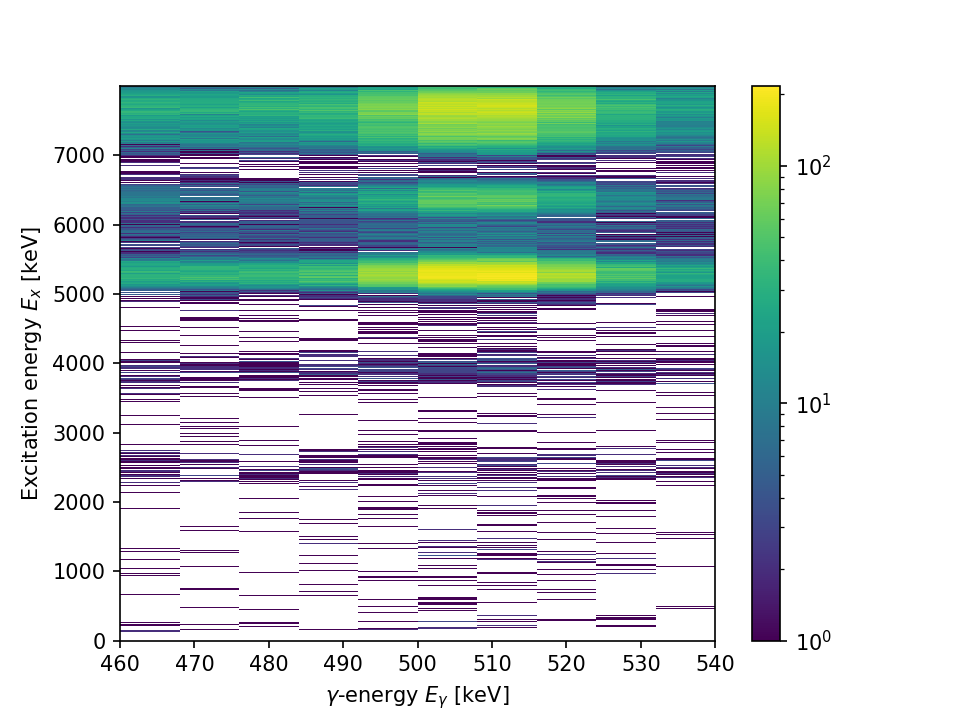

<IPython.core.display.Javascript object>


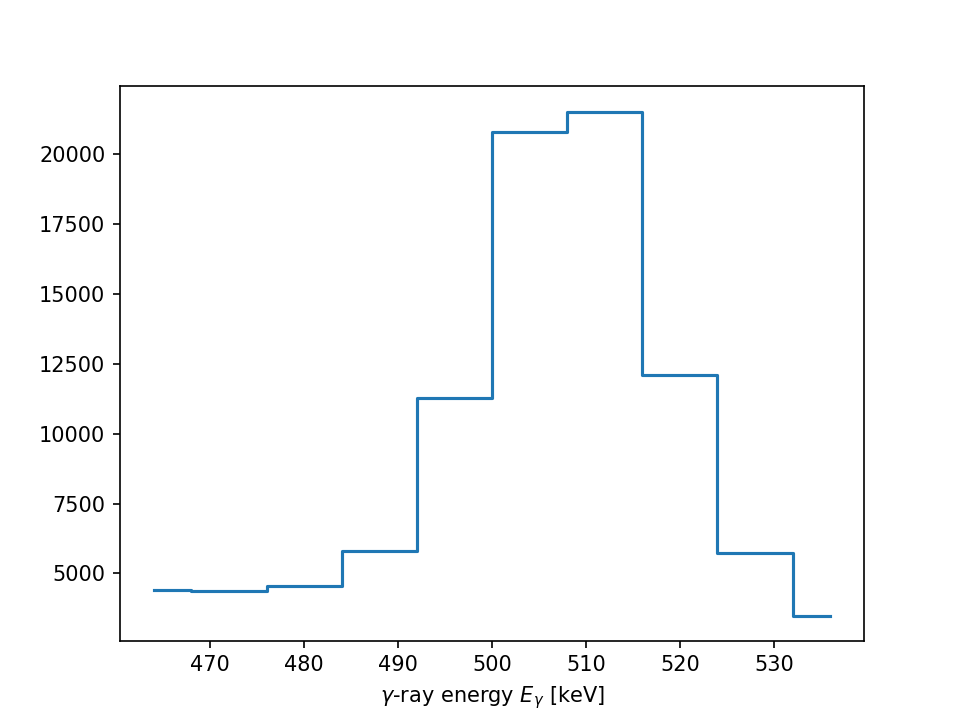

<IPython.core.display.Javascript object>


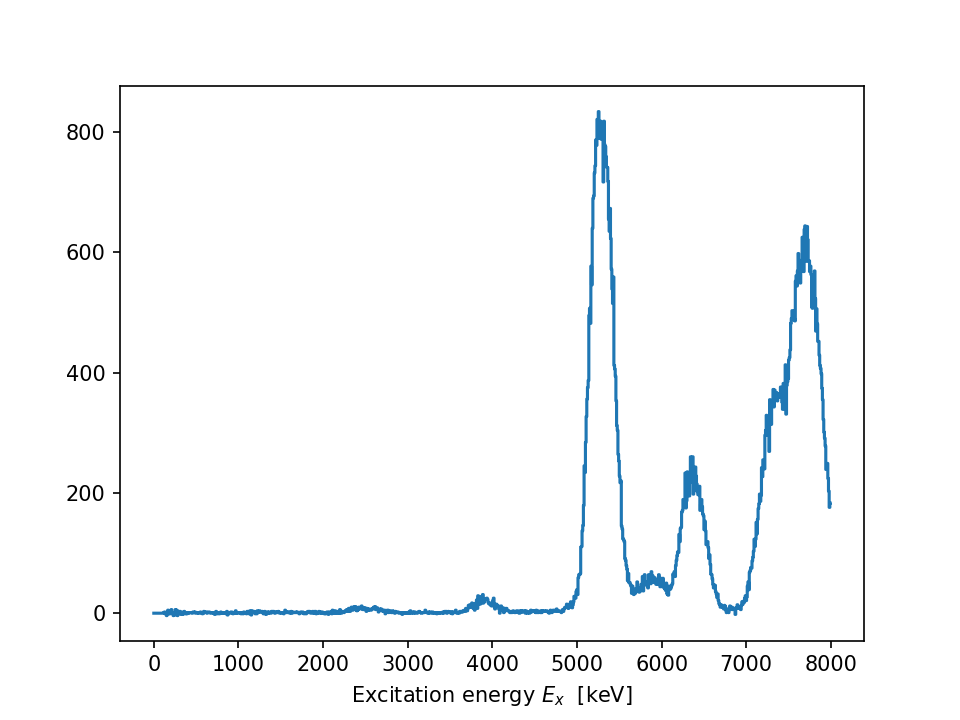

<AxesSubplot: xlabel='Excitation energy $E_{x}$  [$\\mathrm{keV}$]'>

In [239]:
m2 = m.loc[:, 460:540]
m2.plot()
eg_vec = m2.projection('Eg')
ex_vec = m2.projection('Ex')
eg_vec.plot()
ex_vec.plot()

<IPython.core.display.Javascript object>


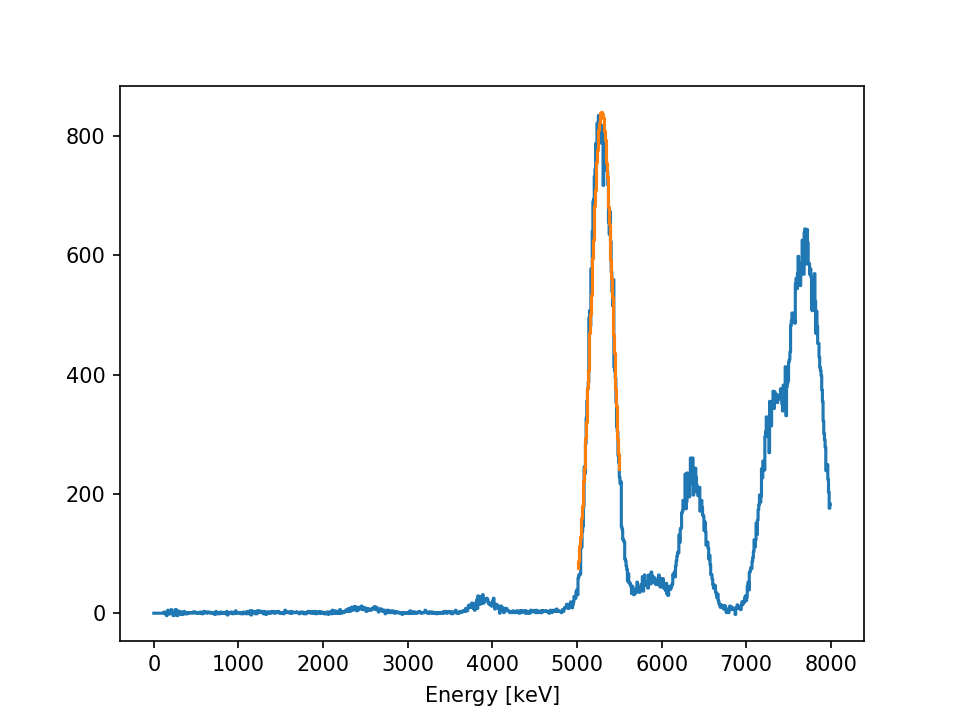

<IPython.core.display.Javascript object>


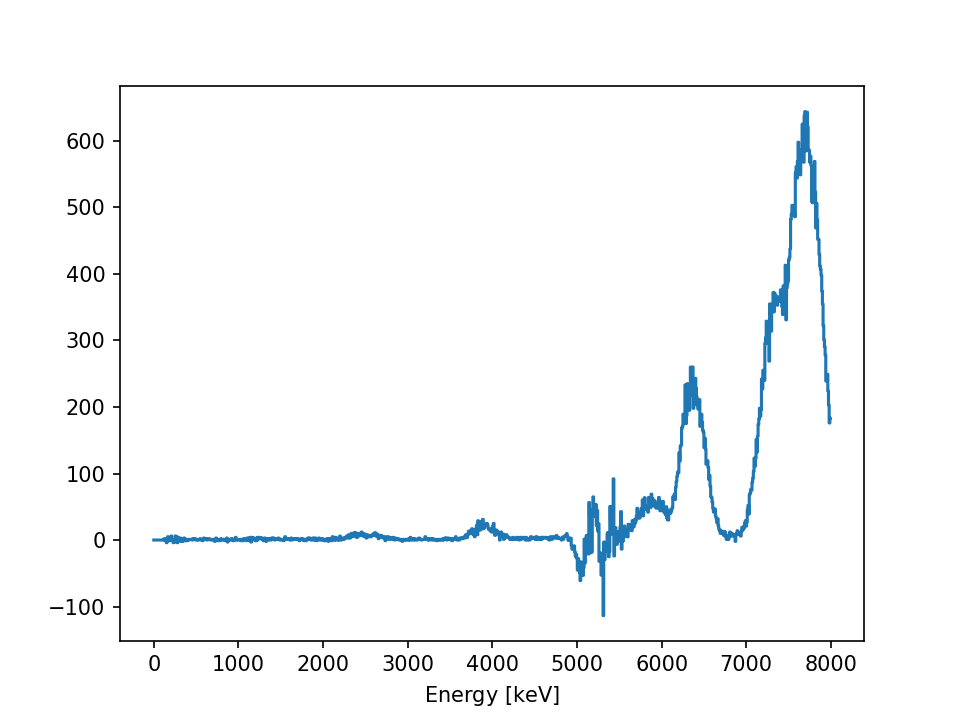

<IPython.core.display.Javascript object>


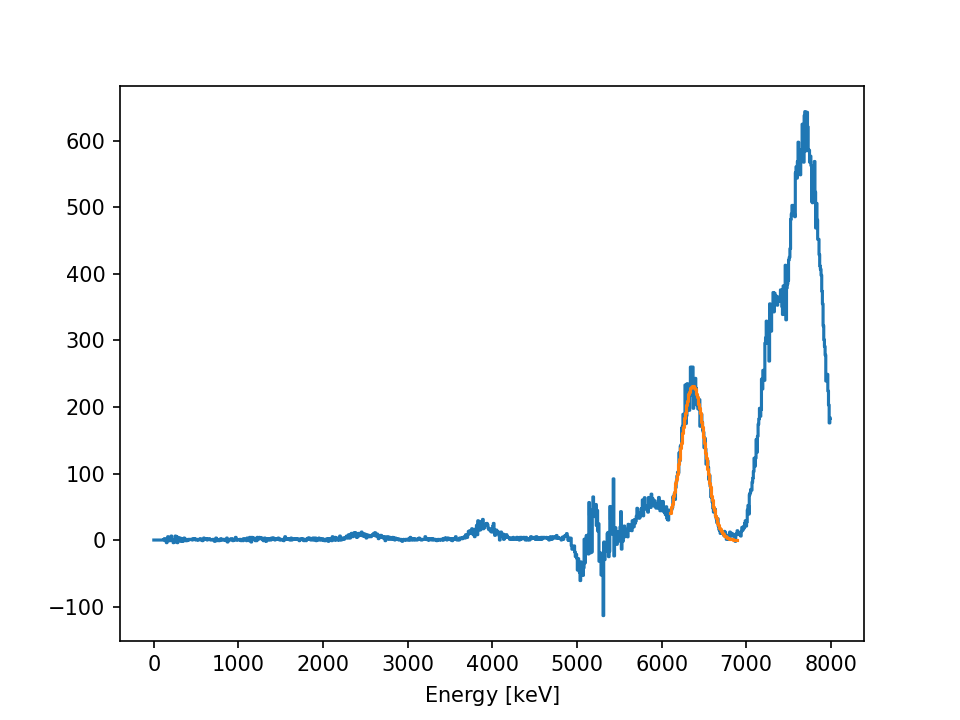

<IPython.core.display.Javascript object>


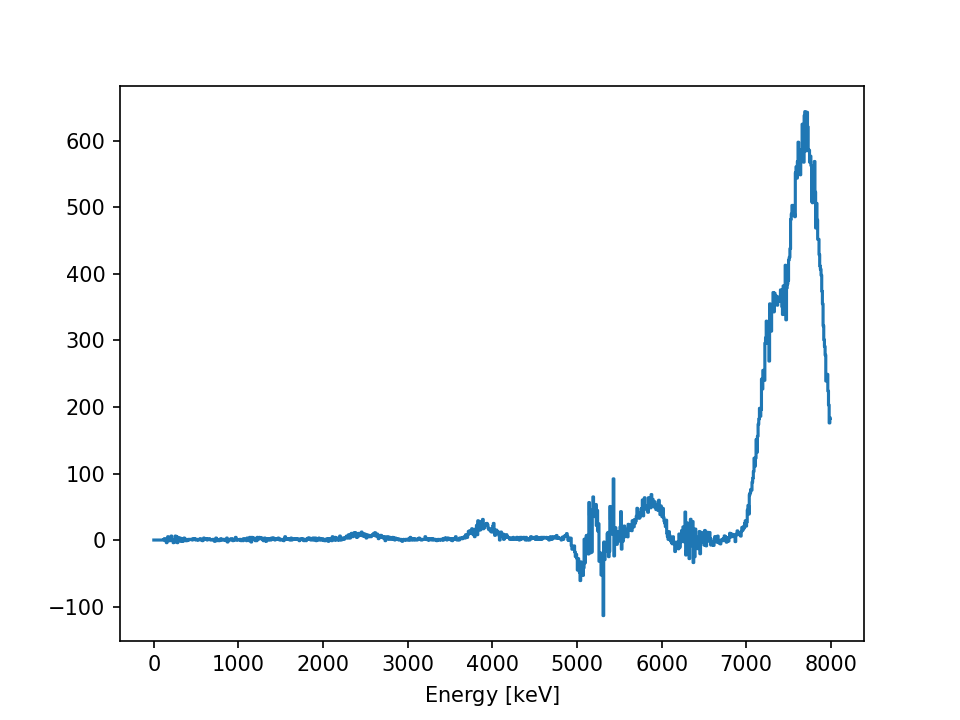

<IPython.core.display.Javascript object>


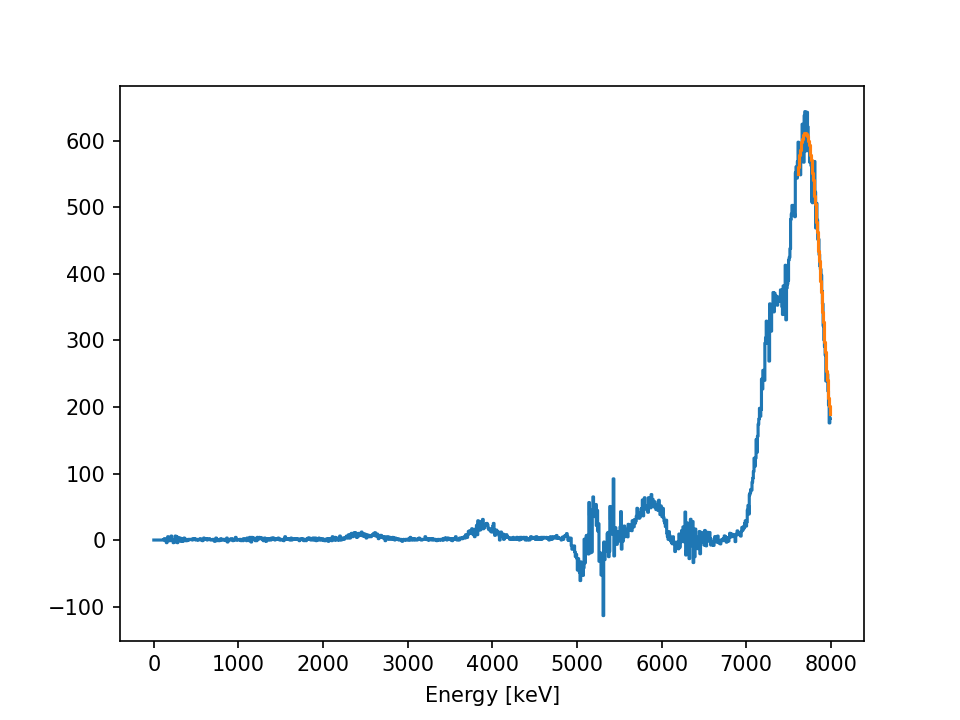

<IPython.core.display.Javascript object>


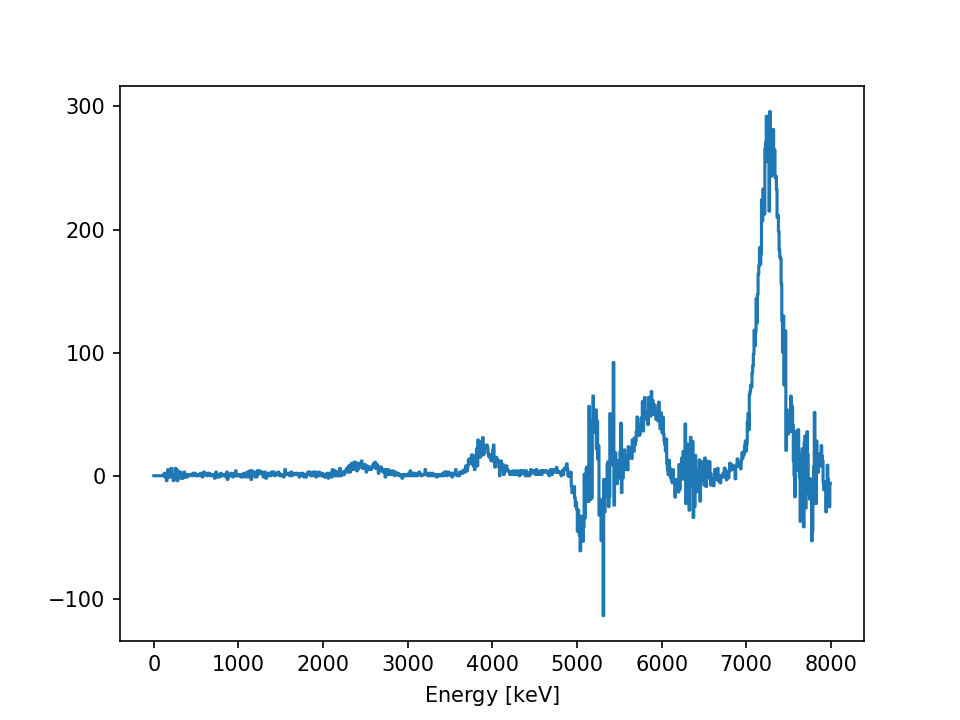

<IPython.core.display.Javascript object>


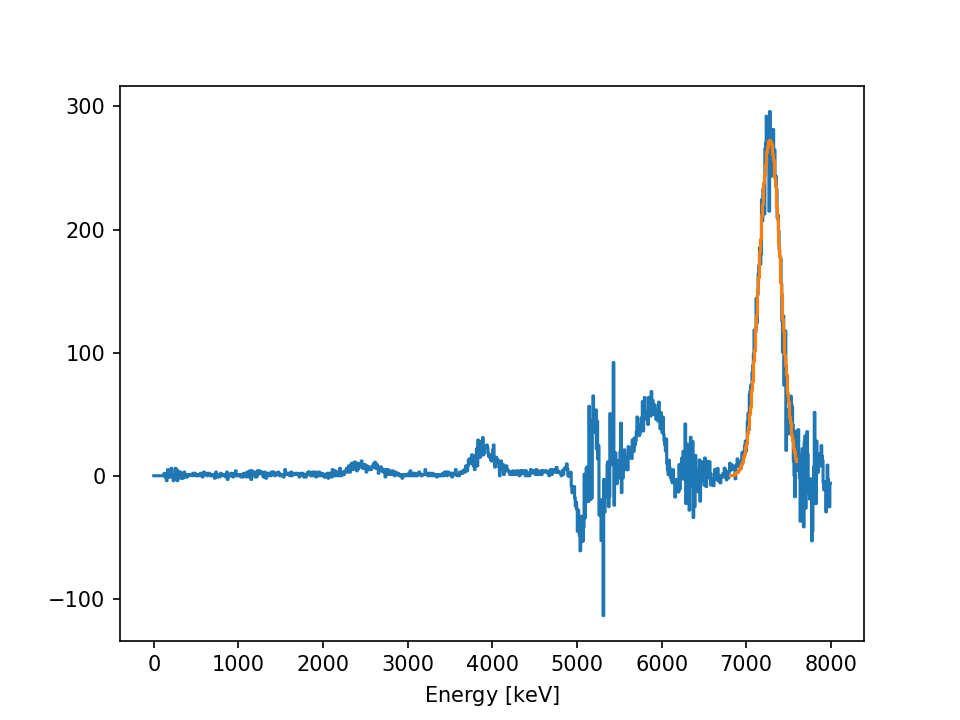

<IPython.core.display.Javascript object>


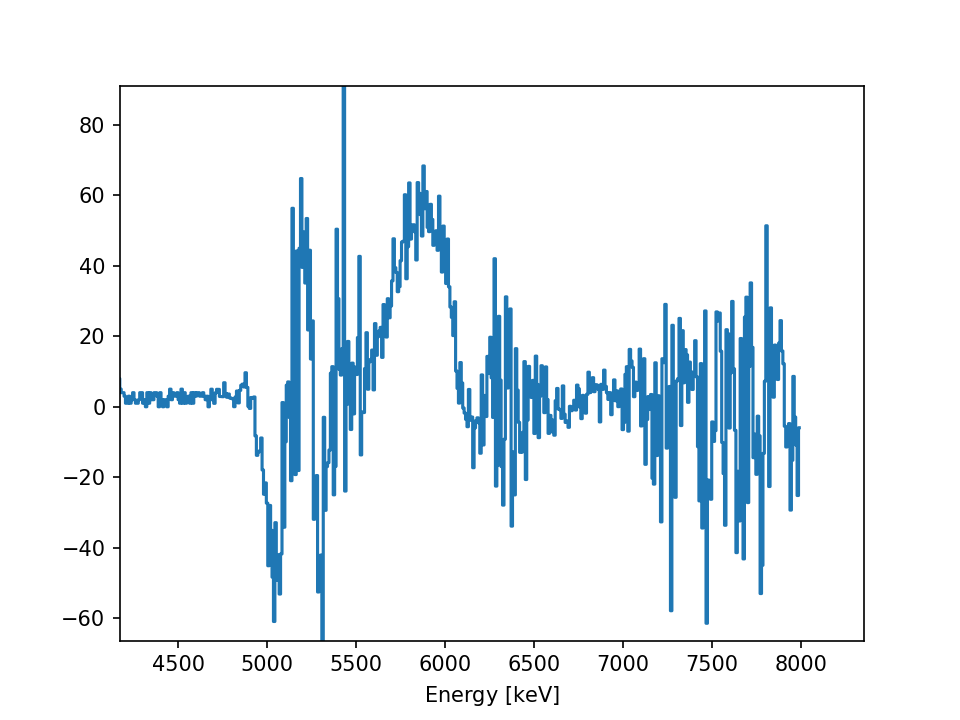

<IPython.core.display.Javascript object>


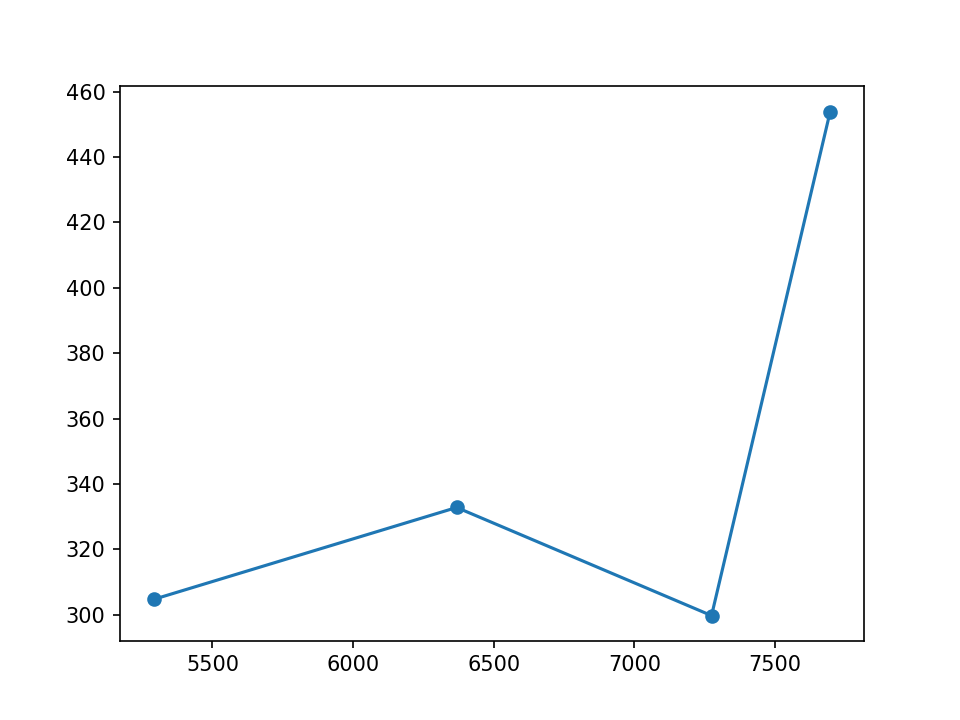

In [266]:
mask = (ex_vec.E > 5000) & (ex_vec.E < 5500)
ex_fit1 = om.fit_gauss(ex_vec, mask)

ax=ex_vec.plot()
ex_fit1.plot(ax=ax)
g = ex_fit1.as_vector(ex_vec)
res = ex_vec - g
ax = res.plot()

mask = (ex_vec.E > 6100) & (ex_vec.E < 6900)
ex_fit2 = om.fit_gauss(res, mask)

ax=res.plot()
ex_fit2.plot(ax=ax)
g = ex_fit2.as_vector(ex_vec)
res2 = res - g
ax = res2.plot()

mask = (ex_vec.E > 7600) & (ex_vec.E < 8000)
ex_fit3 = om.fit_gauss(res2, mask)

ax=res2.plot()
ex_fit3.plot(ax=ax)
g = ex_fit3.as_vector(ex_vec)
res3 = res2 - g
ax = res3.plot()


mask = (ex_vec.E > 6800) & (ex_vec.E < 7600)
ex_fit4 = om.fit_gauss(res3, mask)

ax=res3.plot()
ex_fit4.plot(ax=ax)
g = ex_fit4.as_vector(ex_vec)
res4 = res3 - g
ax = res4.plot()

fig, ax = plt.subplots()
fits = [ex_fit1, ex_fit2, ex_fit4, ex_fit3]
fwhm = [f.fwhm for f in fits]
mu = [f.mu for f in fits]
ax.plot(mu, fwhm, 'o-')

<IPython.core.display.Javascript object>


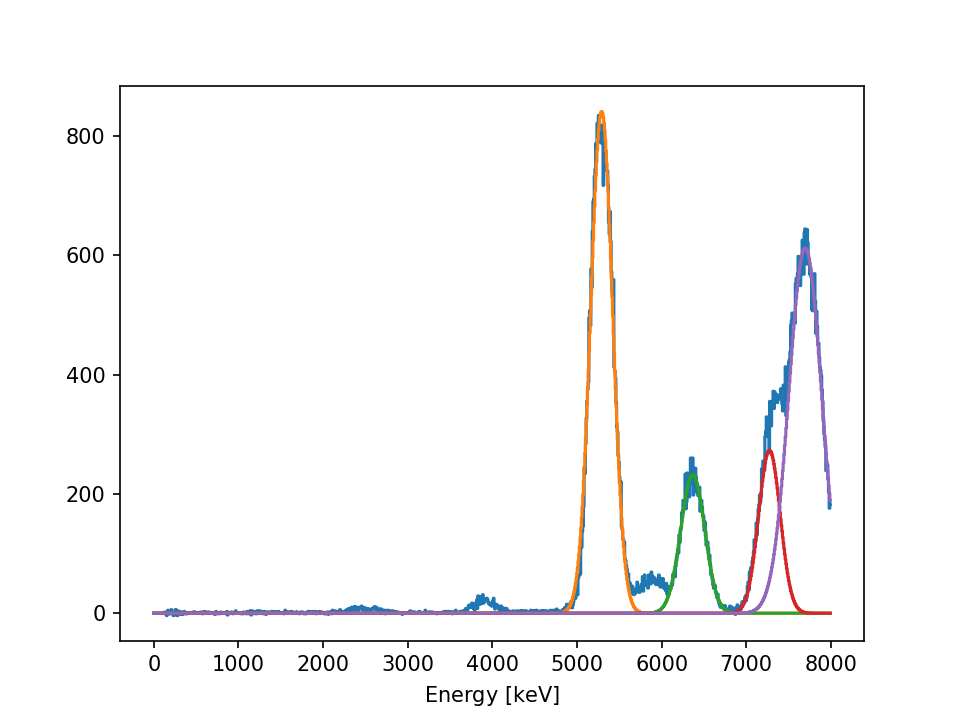

5291.649421740937 304.7505345207875
6368.411916689204 332.83264405486557
7274.724354581823 299.76918315447716
7696.5528569051385 453.8840879570911


In [267]:
fits
ax=ex_vec.plot()
for fit in fits:
    print(f"{fit.mu} {fit.fwhm}")
    fit.as_vector(ex_vec).plot(ax=ax)

In [219]:
d2 =data.gammas.query('Ei < 8000')

In [220]:
print(d2)

120.42 keV → 0.00 keV: Eg 120.42 keV, 0-, T=5.25 US 6 keV
298.22 keV → 0.00 keV: Eg 298.22 keV, 3-, T=91.3 PS 13 keV
397.27 keV → 120.42 keV: Eg 276.85 keV, 1-, T=3.90 PS 4 keV
397.27 keV → 0.00 keV: Eg 397.27 keV, 1-, T=3.90 PS 4 keV



In [116]:
l, g = om.get_nucleus_df('16N')

In [117]:
g['E Gamma']

0    120.42
1    298.22
2    397.27
3    276.85
Name: E Gamma, dtype: float64

In [188]:
ex, eg = data.gammas.query('Ei < 16000').transitions()

Ef:  0.8800000000001091
Ef:  4440.28
4440.28 0 4439.82 keV → 0.88 keV: Eg 4438.94 keV, 2+, T=10.8E-3 EV 6 keV 0.4600000000000364 True
Ef:  4.0
Ef:  4443.0
4443.0 0 9641.00 keV → 4.00 keV: Eg 9637.00 keV, 3-, T=46 KEV 3 keV -5198.0 False
4443.0 1 7654.07 keV → 4440.28 keV: Eg 3213.79 keV, 0+, T=9.3 EV 9 keV -3211.0699999999997 False
4443.0 2 4439.82 keV → 0.88 keV: Eg 4438.94 keV, 2+, T=10.8E-3 EV 6 keV 3.180000000000291 True
Ef:  7.0
Ef:  4445.0
4445.0 0 12710.00 keV → 7.00 keV: Eg 12703.00 keV, 1+, T=18.1 EV 28 keV -8265.0 False
4445.0 1 12710.00 keV → 4443.00 keV: Eg 8267.00 keV, 1+, T=18.1 EV 28 keV -8265.0 False
4445.0 2 9641.00 keV → 4.00 keV: Eg 9637.00 keV, 3-, T=46 KEV 3 keV -5196.0 False
4445.0 3 7654.07 keV → 4440.28 keV: Eg 3213.79 keV, 0+, T=9.3 EV 9 keV -3209.0699999999997 False
4445.0 4 4439.82 keV → 0.88 keV: Eg 4438.94 keV, 2+, T=10.8E-3 EV 6 keV 5.180000000000291 True
Ef:  12710.0
12710.0 0 15110.00 keV → 4445.00 keV: Eg 10665.00 keV, 1+, T=43.6 EV 10 keV -2400.0 False

In [190]:
eg

[[Gamma(Ei=4439.82, E=4438.94, jpi=[Spin(spin=2, parity=True)], T='10.8E-3 EV 6')],
 [Gamma(Ei=4439.82, E=4438.94, jpi=[Spin(spin=2, parity=True)], T='10.8E-3 EV 6')],
 [Gamma(Ei=9641.0, E=9637.0, jpi=[Spin(spin=3, parity=False)], T='46 KEV 3')],
 [Gamma(Ei=4439.82, E=4438.94, jpi=[Spin(spin=2, parity=True)], T='10.8E-3 EV 6')],
 [Gamma(Ei=12710.0, E=12703.0, jpi=[Spin(spin=1, parity=True)], T='18.1 EV 28')],
 [Gamma(Ei=4439.82, E=4438.94, jpi=[Spin(spin=2, parity=True)], T='10.8E-3 EV 6')],
 [Gamma(Ei=12710.0, E=12703.0, jpi=[Spin(spin=1, parity=True)], T='18.1 EV 28')],
 [Gamma(Ei=7654.07, E=3213.79, jpi=[Spin(spin=0, parity=True)], T='9.3 EV 9'),
  Gamma(Ei=4439.82, E=4438.94, jpi=[Spin(spin=2, parity=True)], T='10.8E-3 EV 6')],
 [Gamma(Ei=15110.0, E=15100.0, jpi=[Spin(spin=1, parity=True)], T='43.6 EV 10')],
 []]

In [187]:
print(data.gammas.query('Ei < 16000'))

4439.82 keV → 0.88 keV: Eg 4438.94 keV, 2+, T=10.8E-3 EV 6 keV
7654.07 keV → 4440.28 keV: Eg 3213.79 keV, 0+, T=9.3 EV 9 keV
9641.00 keV → 4.00 keV: Eg 9637.00 keV, 3-, T=46 KEV 3 keV
12710.00 keV → 4443.00 keV: Eg 8267.00 keV, 1+, T=18.1 EV 28 keV
12710.00 keV → 7.00 keV: Eg 12703.00 keV, 1+, T=18.1 EV 28 keV
15110.00 keV → 4445.00 keV: Eg 10665.00 keV, 1+, T=43.6 EV 10 keV
15110.00 keV → 12710.00 keV: Eg 2400.00 keV, 1+, T=43.6 EV 10 keV
15110.00 keV → 7657.00 keV: Eg 7453.00 keV, 1+, T=43.6 EV 10 keV
15110.00 keV → 10.00 keV: Eg 15100.00 keV, 1+, T=43.6 EV 10 keV
15110.00 keV → 10301.00 keV: Eg 4809.00 keV, 1+, T=43.6 EV 10 keV



# ResponseData

In [207]:
rd = om.response.ResponseData.from_file("../OCL_response_functions/oscar2017_scale1.15/")
#rd = om.response.ResponseData.from_zip("../OCL_response_functions/oscar2020/")

<IPython.core.display.Javascript object>


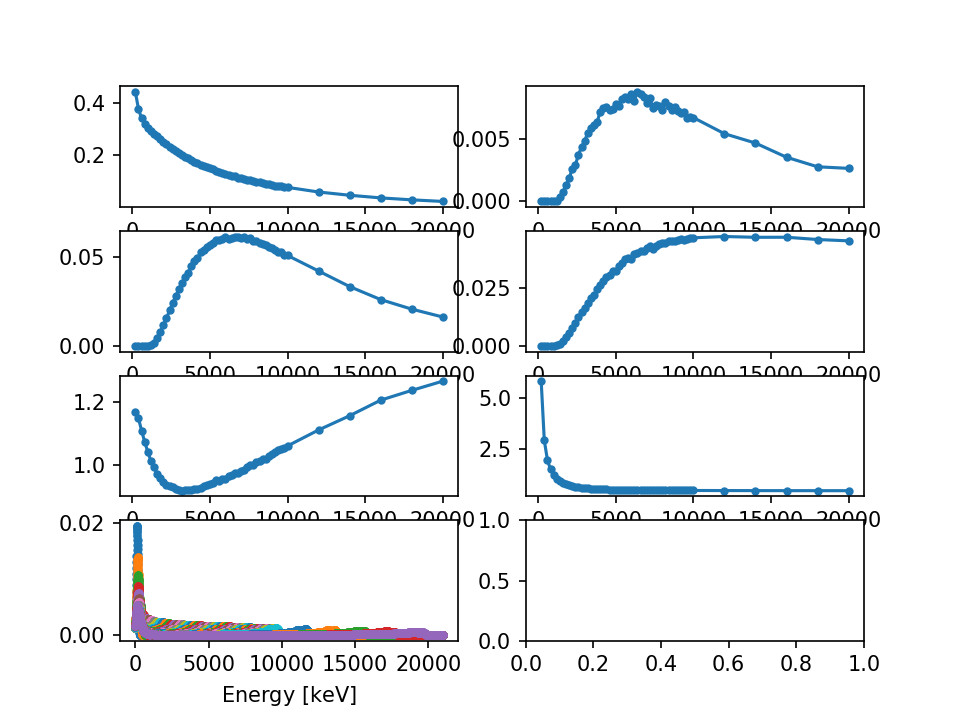

array([<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>,
       <AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>, <AxesSubplot: >],
      dtype=object)

In [213]:
normed = rd.normalize()
ax = normed.plot(kind='dot')
om.response.ResponseInterpolation.from_data(normed).plot(ax=ax)

<IPython.core.display.Javascript object>


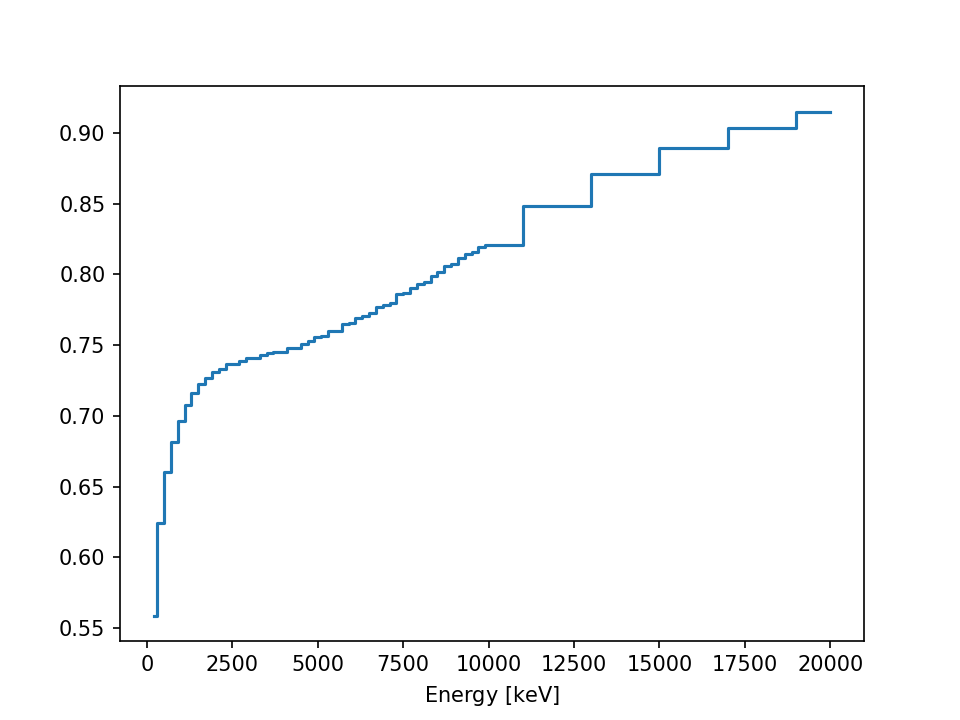

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>

In [211]:
rd.normalize().compton_sum().plot()

In [185]:
r = R.interpolate(spectrum.E, 30, compton=1)

[ 325626.00762767  323327.34854309  309991.98331528  300296.03112403
  291795.07088531 2838869.60866642 2782246.81994127 2729312.3984039
 2693593.87468378 2668643.97352669  264497.56604677  263490.60324563
  262946.79186313  261886.350896    261842.85522894  262170.45053384
  262988.20198204  264118.92861177  264008.69848643  265606.02294107
  266573.79955969  268306.34631228  269108.05137035  271097.22986053
  272140.31945338  274294.59392017  276448.22465877  276613.13606758
  277688.40363874  278376.59474285  281257.92011885  282020.25999182
  283809.22440984  284705.65472553  286339.43364633  287812.5594031
  290280.03140611  292029.07240011  292665.99252842  295281.05299692
  297135.27050362  299004.84293345  299394.90400941  302087.9477315
  303040.20914184  305640.23649661  306751.89390589  307599.08344139
  309268.88007661  311167.09633508  326493.87920972  339545.4928166
  353984.64122934  362698.3702232   371095.25724735]


In [187]:
R.compton_matrix.shape

(55, 4200)

In [190]:
rd.compton[0].shape

(2048,)

In [196]:
V = om.Vector(path="../OCL_response_functions/oscar2017_scale1.15/cmp12000.m")
V2 = om.Vector(path="../OCL_response_functions/oscar2017_scale1.15/cmp16000.m")
V3 = om.Vector(path="../OCL_response_functions/oscar2017_scale1.15/cmp1000.m")

<IPython.core.display.Javascript object>


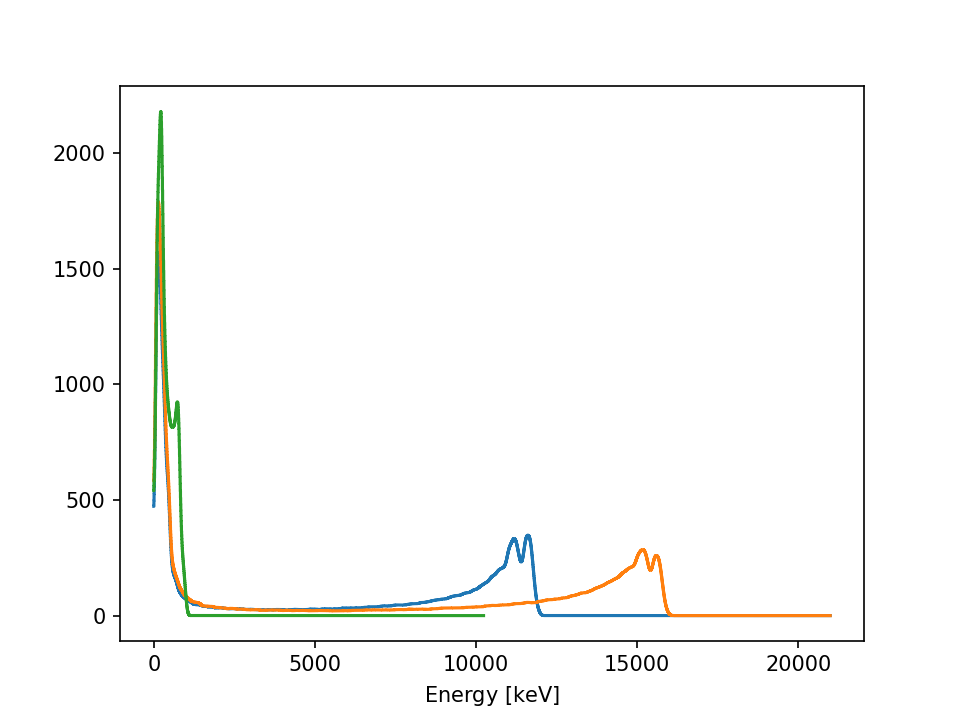

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>

In [197]:
ax = V.plot()
V2.plot(ax=ax)
V3.plot(ax=ax)

In [209]:
import zipfile

# Response GPU

In [2]:
import numba

In [60]:
from numba import cuda

In [59]:
cuda.float32x1

numba.cuda.stubs.float32x1

In [51]:
@numba.cuda.jit
def smooth_gpu(x, out):
    i, j = cuda.grid(2)
    n, m = x.shape
    out[i, j] = 2.0
    #if 1 <= i < n - 1 and 1 <= j < m - 1:
    #    out[i, j] = (x[i-1, j-1] + x[i-1, j] + x[i-1, j+1] +
    #                 x[i  , j-1] + x[i  , j] + x[i  , j+1] +
    #                 x[i+1, j-1] + x[i+1, j] + x[i+1, j+1]) // 9
@cuda.jit       
def increment_by_one(an_array):
    pos = cuda.grid(1)
    if pos < an_array.size:  # Check array boundaries
        an_array[pos] += 2.0

In [52]:
x = np.ones((1000, 1000))
out = np.ones_like(x)

In [57]:
threads_per_block = (16, 16)
gx = int(np.ceil(x.shape[0] / threads_per_block[0]))
gy = int(np.ceil(x.shape[1] / threads_per_block[1]))
blks_p_grid = (gx, gy)
print(blks_p_grid, threads_per_block, np.array(blks_p_grid) * np.array(threads_per_block))
print(out.sum())
d_a = numba.cuda.to_device(out)
d_x = cuda.to_device(x)
smooth_gpu[blks_p_grid, threads_per_block](d_x, d_a)
#increment_by_one[blks_p_grid, threads_per_block](d_a)
a = d_a.copy_to_host()
print(a.sum())

(63, 63) (16, 16) [1008 1008]
1000000.0
2000000.0


In [54]:
@njit(fastmath=True)
def compton_edge(e: float) -> float:
    """ The Compton edge energy. Same as electron_energy(e, π) """
    if e < 0.1:
        return e
    scattered = e / (1 + e / 511 * 2)
    return e - scattered

@njit(fastmath=True)
def backscatter_energy(e: float) -> float:
    """ The backscatter energy """
    return e - compton_edge(e)


array([[2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [3]:
@cuda.jit
def edge(X, E):
    i = cuda.grid(1)
    n = X.size
    if i < n:
        e = E[i]
        if e < 0.1:
            X[i] = e
        else:
            scattered = e / (1 + 2*e/511)
            X[i] = e - scattered
            
@cuda.jit
def backscatter(out, E, edge):
    i = cuda.grid(1)
    if i < out.size:
        out[i] = E[i] - edge[i]
        
import math
@cuda.jit
def angle(out, Et, Eo):
    i, j = cuda.grid(2)
    n, m = out.shape
    if i < n and j < m:
        et = Et[i]
        eo = Eo[j]
        d = et - eo
        r = 1e-14 if d < 1e-14 else d
        z = eo / (et / 511 * r)
        theta = math.acos(1 - z)
        if 0 < theta < np.pi:
            out[i, j] = theta
        else:
            out[i, j] = 0.0

In [12]:
N = 1000
M = 1200
E_true = np.linspace(0, 20e3, N)
E_observed = np.linspace(0, 20e3, M)
d_Et = cuda.to_device(E_true)
d_Eo = cuda.to_device(E_observed)
d_edge = cuda.device_array(N)
d_backscatter = cuda.device_array(N)
d_angle = cuda.device_array((N, M))

In [13]:
threads_per_block = (16, 16)
gx = int(np.ceil(N / threads_per_block[0]))
gy = int(np.ceil(M / threads_per_block[1]))
blks_p_grid = (gx, gy)
print(blks_p_grid, threads_per_block, np.array(blks_p_grid) * np.array(threads_per_block))
edge[blks_p_grid, threads_per_block](d_edge, d_Et)
backscatter[blks_p_grid, threads_per_block](d_backscatter, d_Et, d_edge)
angle[blks_p_grid, threads_per_block](d_angle, d_Et, d_Eo)
#increment_by_one[blks_p_grid, threads_per_block](d_a)

(63, 75) (16, 16) [1008 1200]


In [14]:
h_edge = d_edge.copy_to_host()
h_backscatter = d_backscatter.copy_to_host()
h_angle = d_angle.copy_to_host()

<IPython.core.display.Javascript object>


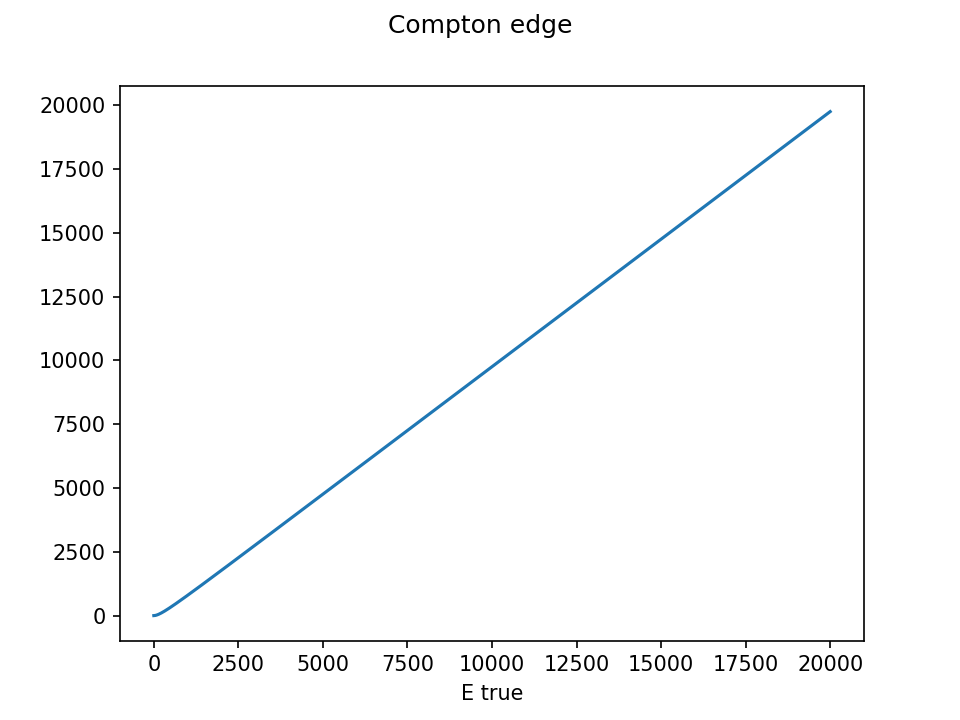

<IPython.core.display.Javascript object>


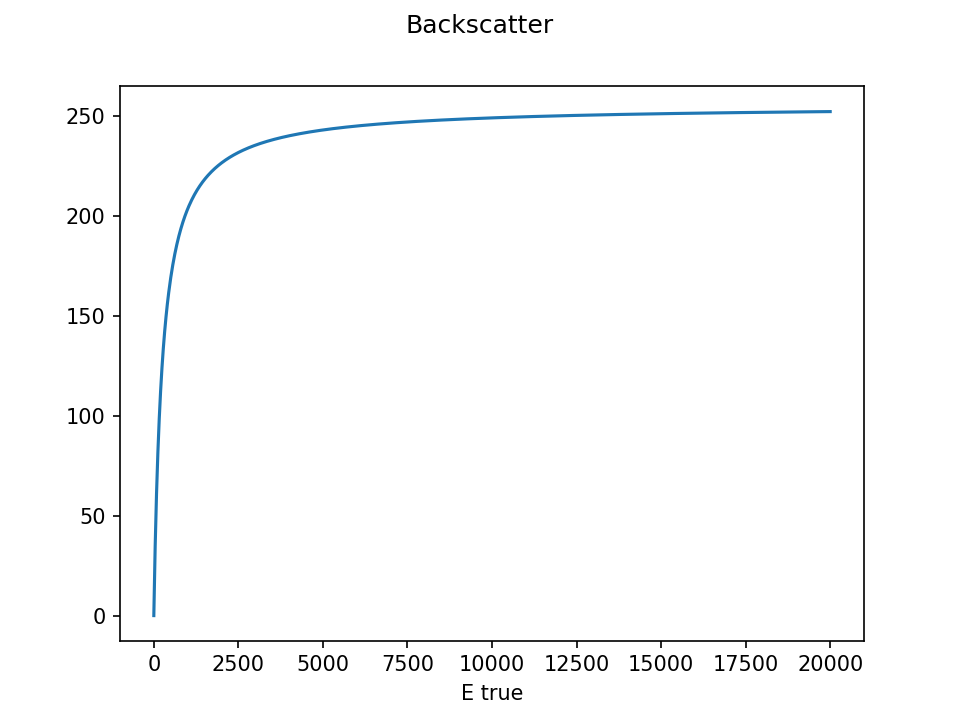

<IPython.core.display.Javascript object>


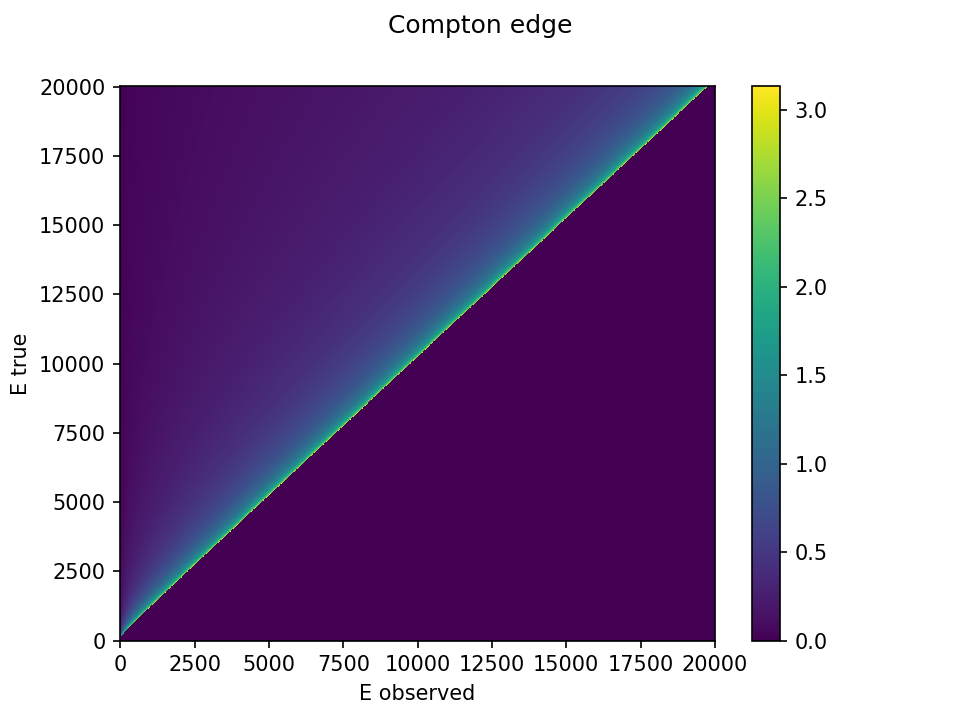

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(E_true, h_edge)
ax.set_xlabel('E true')
fig.suptitle('Compton edge')

fig, ax = plt.subplots()
ax.plot(E_true, h_backscatter)
ax.set_xlabel('E true')
fig.suptitle('Backscatter')

fig, ax = plt.subplots()
m = ax.pcolormesh(E_observed, E_true, h_angle)
ax.set_xlabel("E observed")
ax.set_ylabel("E true")
fig.suptitle('Compton edge')
fig.colorbar(m)

<IPython.core.display.Javascript object>


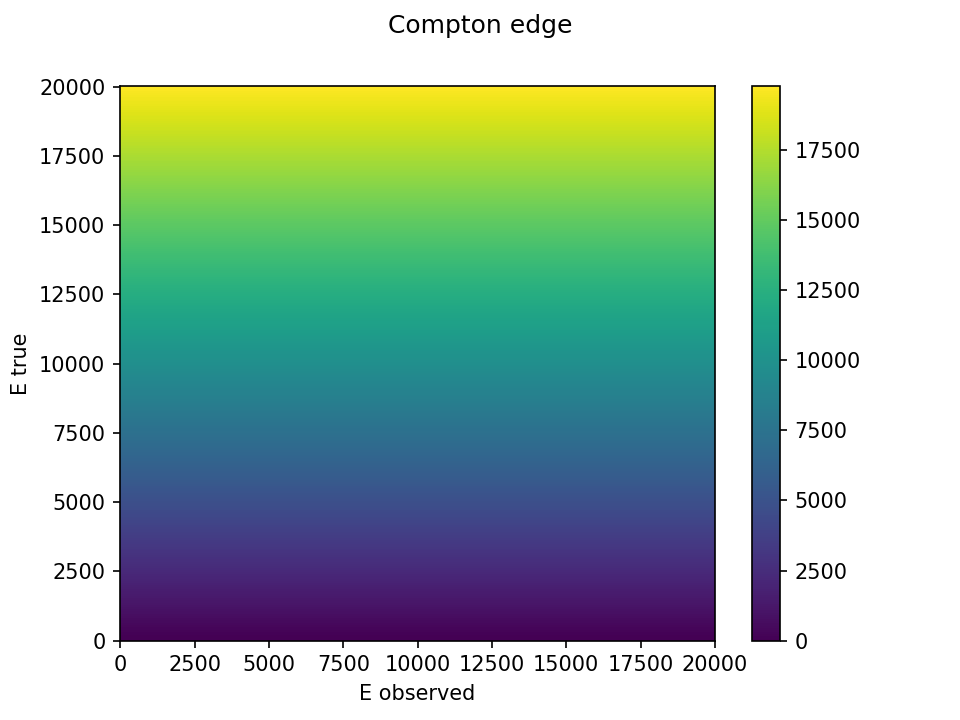

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
m = ax.pcolormesh(E_observed, E_true, Y)
ax.set_xlabel("E observed")
ax.set_ylabel("E true")
fig.suptitle('Compton edge')
fig.colorbar(m)

<IPython.core.display.Javascript object>


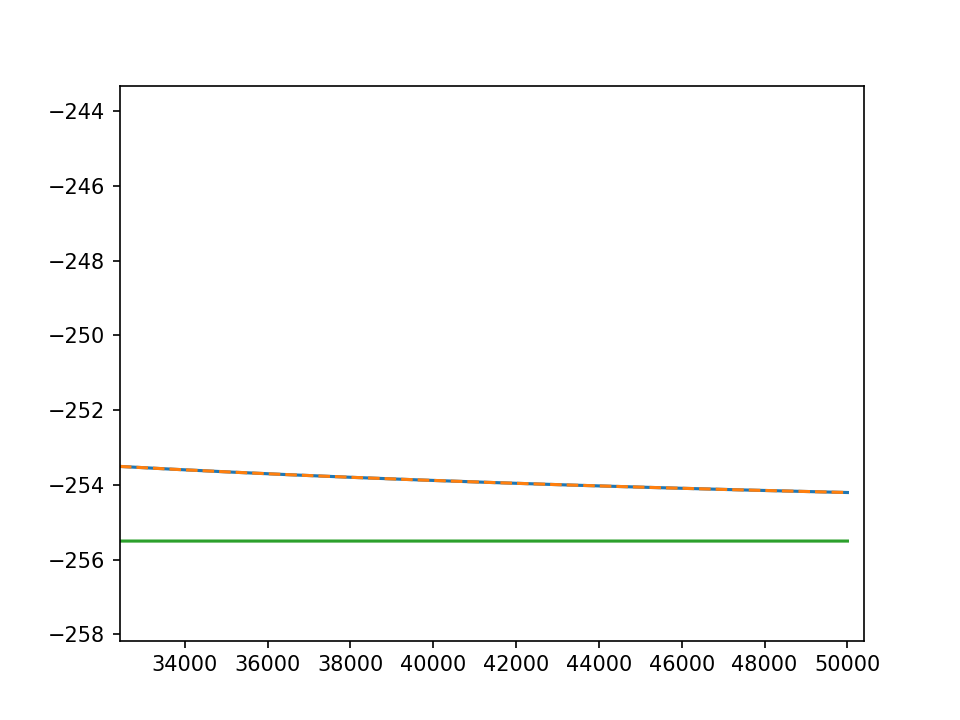

In [75]:
x = np.linspace(0.1, 5e4, int(1e4))
y = 2*x**2/(2*x + 511)
z = x - x/(1+2*x/511)
fig, ax = plt.subplots()
ax.plot(x, y - x)
ax.plot(x, z - x, '--')
ax.plot(x, (x -511/2) - x)

In [156]:
import numba
numba.float32

float32

In [23]:
rd = om.response.ResponseData.from_db('Oscar2017').normalize()
rdi = om.response.ResponseInterpolation.from_data(rd)

In [94]:
N = 4000
E_true = np.linspace(500, 15e3, N)
E_o = rd.E_compton
sigma = rdi.sigma
%timeit R = om.response.comptongpu.interpolate_gpu(rd, E_true, sigma)

83.7 ms ± 673 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<IPython.core.display.Javascript object>


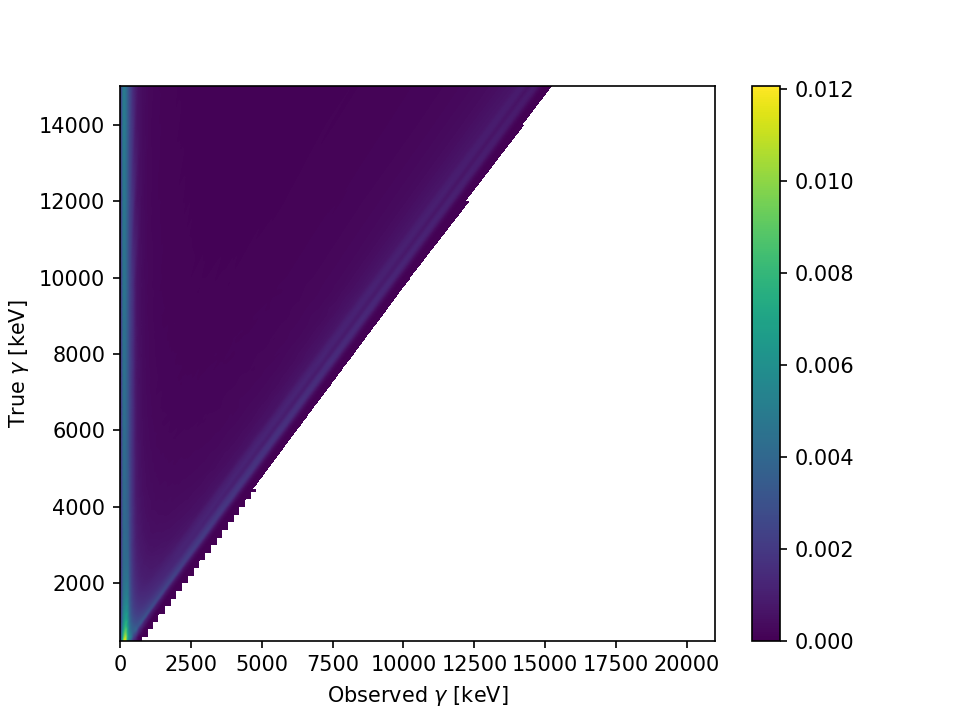

(<AxesSubplot: xlabel='Observed $\\gamma$ [$\\mathrm{keV}$]', ylabel='True $\\gamma$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f5df7b875e0>,
  <matplotlib.colorbar.Colorbar at 0x7f5dc2b533a0>))

In [92]:
R.plot()
#R.plot(scale='log', vmin=1e-5, cmap='turbo')
#R.plot(scale='log')

<IPython.core.display.Javascript object>


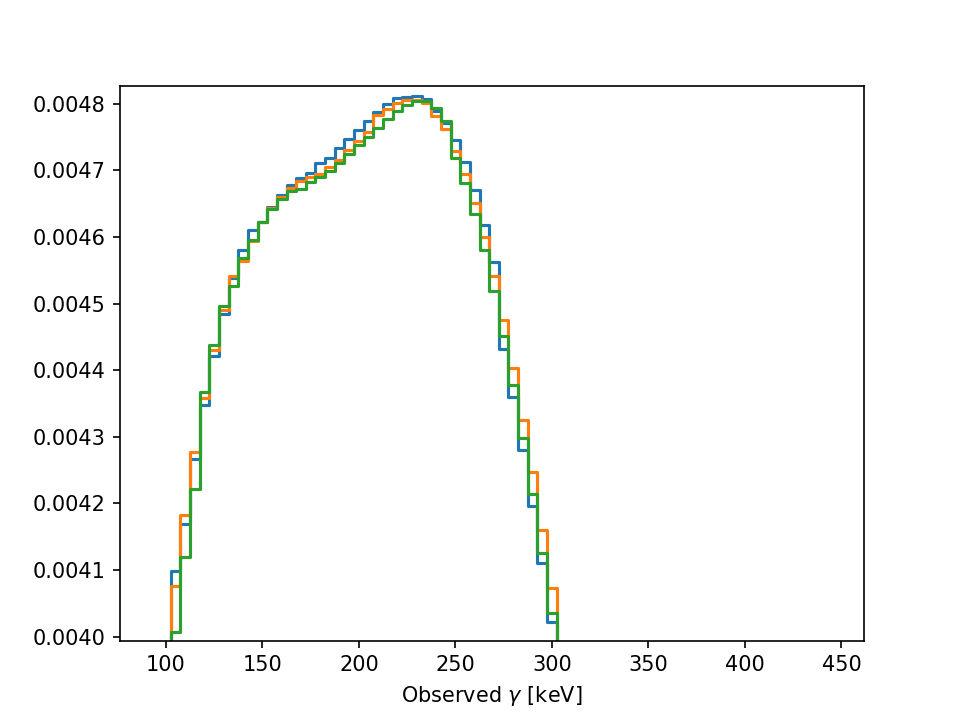

<AxesSubplot: xlabel='Observed $\\gamma$ [$\\mathrm{keV}$]'>

In [55]:
N = 200
ax = R.iloc[N-1, :].plot()
R.iloc[N, :].plot(ax=ax)
R.iloc[N+1, :].plot(ax=ax)

<IPython.core.display.Javascript object>


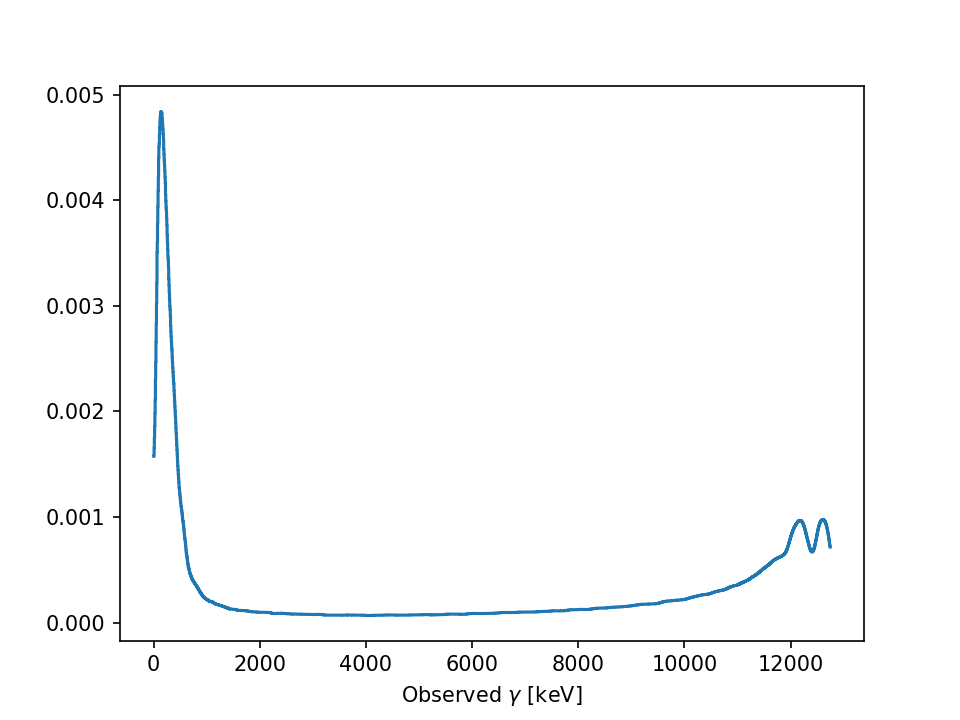

In [10]:
N = 13000
ax = R.loc[N, :].plot()

<IPython.core.display.Javascript object>


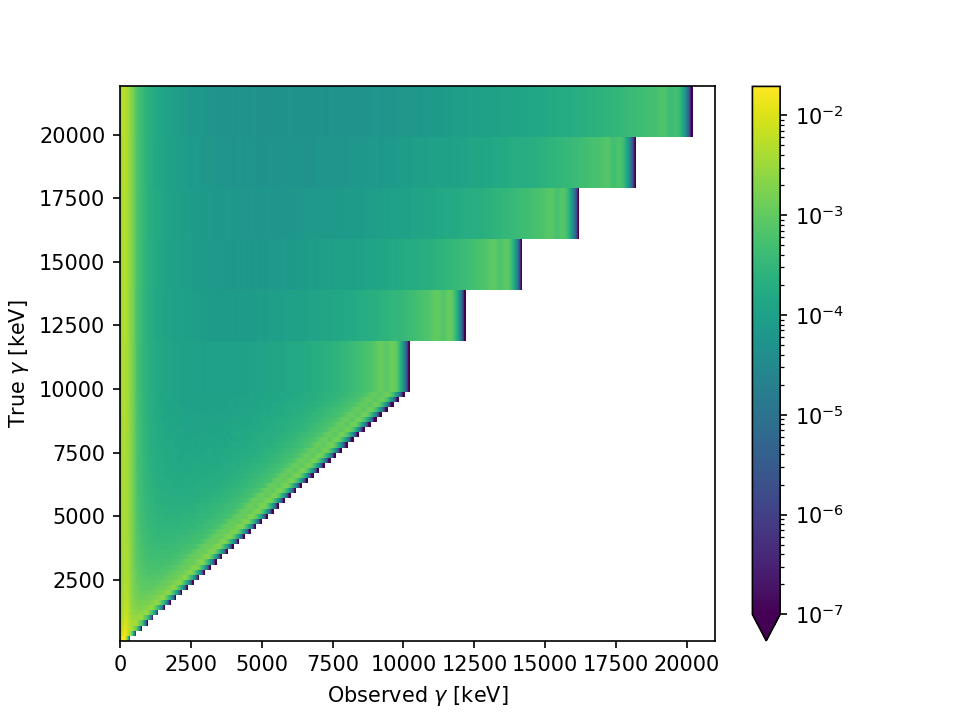

(<AxesSubplot: xlabel='Observed $\\gamma$ [$\\mathrm{keV}$]', ylabel='True $\\gamma$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f5dfd9880d0>,
  <matplotlib.colorbar.Colorbar at 0x7f5dfdab82b0>))

In [19]:
CM = rd.compton_matrix()
CM.plot(scale='log')

<IPython.core.display.Javascript object>


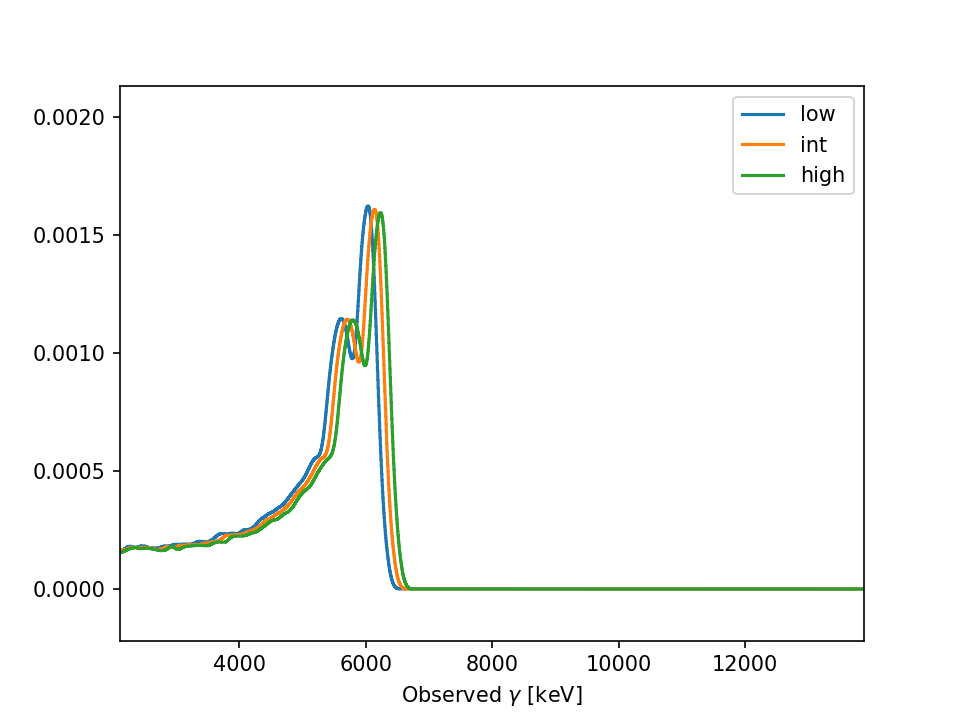

6400.0


In [76]:
fig, ax = plt.subplots()
E = 6500
spec = R.loc[E,  :]
i = np.argmin(abs(CM.Ex - E))
low = CM.iloc[i, :]
high = CM.iloc[i+1, :]
print(CM.Ex[i])
low.plot(ax=ax, label='low')
spec.plot(ax=ax, label='int')
high.plot(ax=ax, label='high')
ax.legend()


# 167Ho

In [22]:
holm = om.Matrix(path="./167Ho_raw.m")
holm2 = om.Matrix(path="./167Ho_raw_with_bg.m")

<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>

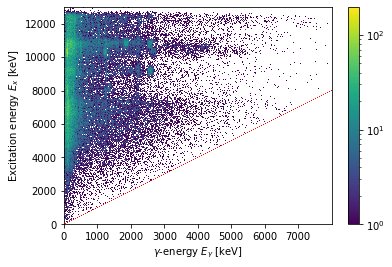

In [23]:
holm = holm.loc[:'13MeV', :'8MeV']
line = om.Line(slope=1, p1=(0,0))
holm[line.above(holm)] = 0
ax, _ = holm.plot()
line.plot(holm, ax=ax)

In [6]:
holm.summary()

Eᵧ: 0.0 to 16376.0 [keV]
2048 bins with dEᵧ: 8.0
Eₓ: 0.0 to 16376.0 [keV]
2048 bins with dEₓ: 8.0
Total counts: 2,200,966.0



In [7]:
holm2.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f2f2c100>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f2f4eaa0>))

In [8]:
bg = holm2 - holm
bg.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f3516da0>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f3499150>))